# Inverted Repeats Genomic Compartment Analysis 

In [1]:
import gzip
import os
import pandas
from dotenv import load_dotenv
import numpy as np
from pathlib import Path
import pandas as pd
import json
from dotenv import load_dotenv
import os
load_dotenv("paths.env")
with open("/storage/group/izg5139/default/nicole/inverted_repeats/genomic_data/metadata_assembly/final_extractions_nd.json", mode="r") as f:
    data = json.load(f)

len(data)

compartments = ["gene", "exon", "CDS"]

domains = ["Archaea", "Eukaryota", "Bacteria", "Viruses"]
domain_colors = {
                'Viruses': '#b2ebeb',
                'Eukaryota': '#ffb2b2',
                'Archaea': '#b2b2ff',
                'Bacteria': '#b2d8b2'
                }


load_dotenv("paths.env")
DATABASE = os.getenv("DATABASE")
IRP_DB = os.getenv("IRP_DB")
EMPTY_ASSEMBLIES_PATH = os.getenv("EMPTY_ASSEMBLIES")

assert os.path.isdir(DATABASE), "Invalid directory!"
assert os.path.isfile(IRP_DB), "Invalid inverted repeats database."
assert os.path.isfile(EMPTY_ASSEMBLIES_PATH), "Invalid empty assemblies db."

In [2]:
DATABASE

'/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/final_figures'

In [3]:
domains = ["Archaea", "Eukaryota", "Bacteria", "Viruses"]
domain_colors = {
                 'Viruses': '#6bb5c7',
                 'Eukaryota': '#e69c3c',
                 'Archaea': '#b2b2ff',
                 'Bacteria': '#a3c4a3'
            }

kingdom_color_palette = {
                         "Viruses": "#6bb5c7",
                         "Bacteria": "#0fbf2d",
                         "Archaea": "#b2b2ff",
                         "Fungi": "#4d325e",
                         "Plantae": "#b50996",
                         "Eubacteria": "#0fbf2d",
                         "Animalia": "#9bba2d",
                         "Protista": "#c78f5b",
                         "Archaeabacteria": "#7b7bed",
                } 

In [4]:
grouped_genome = pd.read_table("grouped_genome_ir.csv.gz")
grouped_genome

,#assembly_accession,genome_size,phylum,kingdom,superkingdom,coverage
0,GCA_000007325.1,2174500,Fusobacteriota,Eubacteria,Bacteria,3091.285353
1,GCA_000007385.1,4941439,Pseudomonadota,Eubacteria,Bacteria,2214.132361
2,GCA_000008005.1,5432652,Bacillota,Eubacteria,Bacteria,8288.953535
3,GCA_000008085.1,490885,Nanoarchaeota,Archaeabacteria,Archaea,1049.125559
4,GCA_000008885.1,703004,Pseudomonadota,Eubacteria,Bacteria,9233.233381
...,...,...,...,...,...,...
118060,GCF_900500615.1,15378,Negarnaviricota,Viruses,Viruses,0.000000
118061,GCF_900604365.1,58916,Uroviricota,Viruses,Viruses,0.000000
118062,GCF_900692495.1,7557,Pisuviricota,Viruses,Viruses,0.000000
118063,GCF_902006465.1,46703,Uroviricota,Viruses,Viruses,0.000000


In [5]:
cov_df = pd.read_parquet("/storage/group/izg5139/default/nicole/mindi/coverage_out/IR/coverage/coverage_compartments.IR.parquet")
cov_df2 = pd.read_parquet("/storage/group/izg5139/default/nicole/mindi/coverage_out_prokaryotes_viruses/IR/coverage/coverage_compartments.IR.parquet")

cov_df_all = pd.concat([
        cov_df,
        cov_df2,
            ], axis=0
        )\
        .drop_duplicates()\
        .merge(
              grouped_genome,
              on="#assembly_accession",
              how="left"
              )

cov_df_all

,#assembly_accession,spacerLength,compartment,biotype,compartmentLength,totalCompartments,bpCovering,atLeastOne,totalHits,totalCoverage,overlapping,averageCoverage,medianCoverage,minCoverage,maxCoverage,genome_size,phylum,kingdom,superkingdom,coverage
0,GCA_009498135.1,0,CDS,.,8226117,5908,304,15,16,36.955,0.254,33.019,0.0,0.0,29487.2,12096646.0,Ascomycota,Fungi,Eukaryota,314.301997
1,GCA_009498135.1,0,exon,.,8258610,6115,304,15,16,36.810,0.245,31.879,0.0,0.0,29487.2,12096646.0,Ascomycota,Fungi,Eukaryota,314.301997
2,GCA_009498135.1,0,gene,.,8296910,5886,304,15,16,36.640,0.255,33.145,0.0,0.0,29487.2,12096646.0,Ascomycota,Fungi,Eukaryota,314.301997
3,GCA_009498135.1,0,gene,non_coding,32493,207,0,0,0,0.000,0.000,0.000,0.0,0.0,0.0,12096646.0,Ascomycota,Fungi,Eukaryota,314.301997
4,GCA_009498135.1,0,gene,protein_coding,8264417,5679,304,15,16,36.784,0.264,34.379,0.0,0.0,29487.2,12096646.0,Ascomycota,Fungi,Eukaryota,314.301997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813195,GCF_025775335.1,all,CDS,.,38762,65,0,0,0,0.000,0.000,0.000,0.0,0.0,0.0,44082.0,Uroviricota,Viruses,Viruses,589.809900
5813196,GCF_025775335.1,all,exon,.,38762,65,0,0,0,0.000,0.000,0.000,0.0,0.0,0.0,44082.0,Uroviricota,Viruses,Viruses,589.809900
5813197,GCF_025775335.1,all,gene,.,38762,65,0,0,0,0.000,0.000,0.000,0.0,0.0,0.0,44082.0,Uroviricota,Viruses,Viruses,589.809900
5813198,GCF_025775335.1,all,gene,protein_coding,38762,65,0,0,0,0.000,0.000,0.000,0.0,0.0,0.0,44082.0,Uroviricota,Viruses,Viruses,589.809900


In [6]:
cov_df_all.loc[:, "compartment"] = cov_df_all["compartment"].str.replace("five_prime_UTR", "5' UTR")\
                                                            .str.replace("three_prime_UTR", "3' UTR")\
                                                            .str.replace("gene", "Gene")\
                                                            .str.replace("exon", "Exon")

In [7]:
cov_df_compartments = cov_df_all.query("biotype == '.'")
cov_df_compartments

,#assembly_accession,spacerLength,compartment,biotype,compartmentLength,totalCompartments,bpCovering,atLeastOne,totalHits,totalCoverage,overlapping,averageCoverage,medianCoverage,minCoverage,maxCoverage,genome_size,phylum,kingdom,superkingdom,coverage
0,GCA_009498135.1,0,CDS,.,8226117,5908,304,15,16,36.955,0.254,33.019,0.0,0.0,29487.2,12096646.0,Ascomycota,Fungi,Eukaryota,314.301997
1,GCA_009498135.1,0,Exon,.,8258610,6115,304,15,16,36.810,0.245,31.879,0.0,0.0,29487.2,12096646.0,Ascomycota,Fungi,Eukaryota,314.301997
2,GCA_009498135.1,0,Gene,.,8296910,5886,304,15,16,36.640,0.255,33.145,0.0,0.0,29487.2,12096646.0,Ascomycota,Fungi,Eukaryota,314.301997
5,GCA_009498135.1,0,Genome,.,12096646,8,531,8,29,43.896,100.000,39.462,34.0,18.9,79.6,12096646.0,Ascomycota,Fungi,Eukaryota,314.301997
6,GCA_009498135.1,1,CDS,.,8226117,5908,114,6,6,13.858,0.102,17.127,0.0,0.0,38043.5,12096646.0,Ascomycota,Fungi,Eukaryota,314.301997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813194,GCF_025775335.1,8,Genome,.,44082,1,0,0,0,0.000,0.000,0.000,0.0,0.0,0.0,44082.0,Uroviricota,Viruses,Viruses,589.809900
5813195,GCF_025775335.1,all,CDS,.,38762,65,0,0,0,0.000,0.000,0.000,0.0,0.0,0.0,44082.0,Uroviricota,Viruses,Viruses,589.809900
5813196,GCF_025775335.1,all,Exon,.,38762,65,0,0,0,0.000,0.000,0.000,0.0,0.0,0.0,44082.0,Uroviricota,Viruses,Viruses,589.809900
5813197,GCF_025775335.1,all,Gene,.,38762,65,0,0,0,0.000,0.000,0.000,0.0,0.0,0.0,44082.0,Uroviricota,Viruses,Viruses,589.809900


In [8]:
cov_df_compartments['compartment'].unique()

array(['CDS', 'Exon', 'Gene', 'Genome', "5' UTR", "3' UTR"], dtype=object)

In [9]:
data = cov_df_compartments.query("spacerLength == 'all'")
data.groupby("superkingdom").agg({"coverage": "mean"})

,coverage
superkingdom,
Archaea,1154.264518
Bacteria,3243.630625
Eukaryota,1735.360889
Viruses,1927.636623


In [10]:
DATABASE

'/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/final_figures'

/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


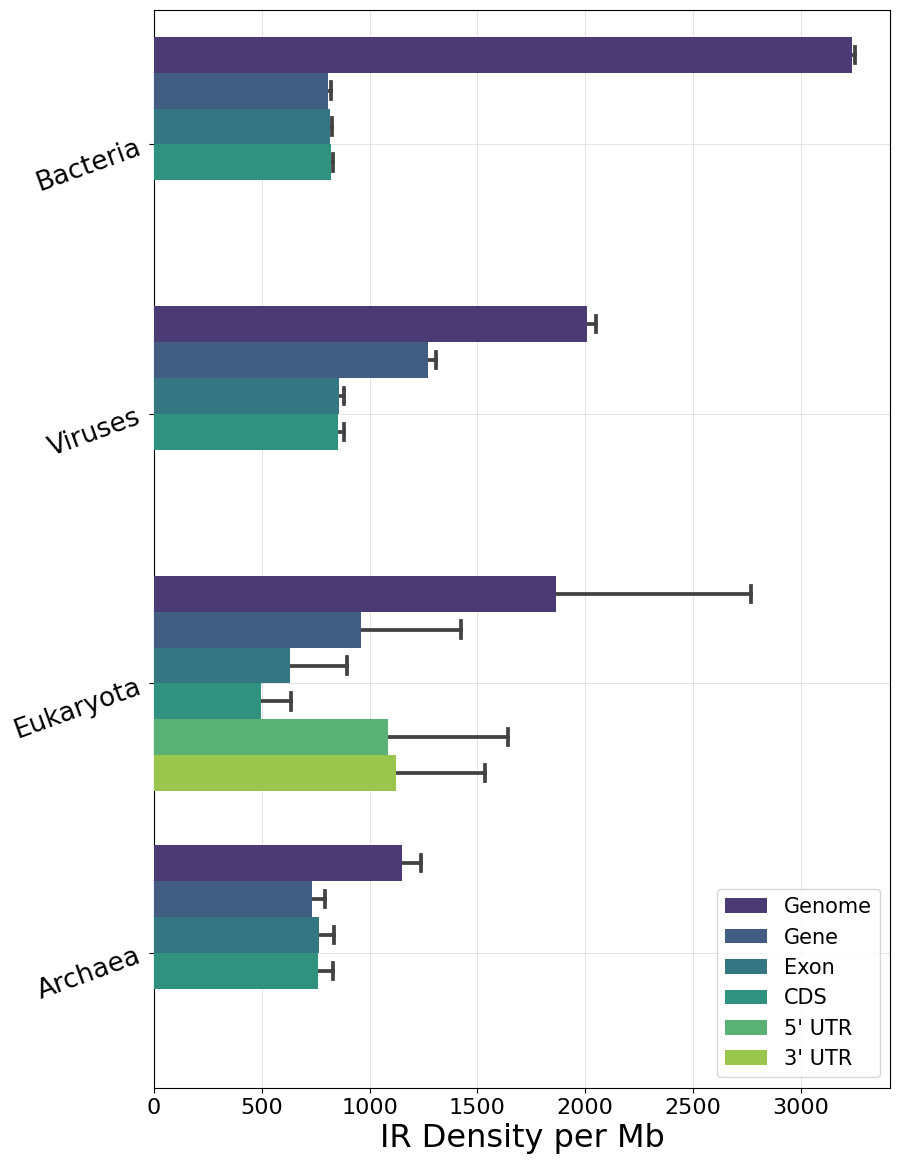

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 14))
data = cov_df_compartments.query("spacerLength == 'all'")
sns.barplot(
            data=data,
            x="totalCoverage",
            hue="compartment",
            y="superkingdom",
            orient="h",
            capsize=0.06,
            color=domain_colors,
            ax=ax,
            palette="viridis",
            order=['Bacteria', 'Viruses', 'Eukaryota', 'Archaea'],
            hue_order=['Genome', 'Gene', 'Exon', 'CDS', "5' UTR", "3' UTR"],
            zorder=3,  
        )

ax.legend(title="", prop={"size": 15})
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=19, rotation=20)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_xlabel("IR Density per Mb")
ax.set_ylabel("")
ax.xaxis.label.set_size(23)
fig.savefig(f"{DATABASE}/IR_density_compartments_all_spacers_domains.png", format="png", bbox_inches='tight')

In [11]:
from colour import Color

def construct_color_palette():
    until = {"Archaea": "#2D2D54",
         "Eukaryota": "#A27171",
         "Bacteria": "#404B40",
         "Viruses": "#304F57"
        }
    sru_colors = {}
    for domain in domain_colors:
        c = Color(domain_colors[domain])
        colors = list(map(str, c.range_to(Color(until[domain]), 10)))
        sru_colors.update({domain: {str(i): colors[i] for i in range(0, 9)}})
    return sru_colors

In [12]:
sru_colors = construct_color_palette()
sru_colors

{'Viruses': {'0': '#6bb5c7',
  '1': '#5fadc0',
  '2': '#54a4b8',
  '3': '#4b9aae',
  '4': '#478d9f',
  '5': '#438090',
  '6': '#3f7481',
  '7': '#3a6773',
  '8': '#355b65'},
 'Eukaryota': {'0': '#e69c3c',
  '1': '#df9041',
  '2': '#d88747',
  '3': '#d07e4d',
  '4': '#c97853',
  '5': '#c17358',
  '6': '#ba705e',
  '7': '#b26e64',
  '8': '#aa6f6b'},
 'Archaea': {'0': '#b2b2ff',
  '1': '#9595fb',
  '2': '#7a7af4',
  '3': '#6161ea',
  '4': '#4c4cde',
  '5': '#3939cf',
  '6': '#3636b1',
  '7': '#35358f',
  '8': '#323270'},
 'Bacteria': {'0': '#a3c4a3',
  '1': '#95b995',
  '2': '#88ae88',
  '3': '#7ca27c',
  '4': '#6f966f',
  '5': '#668766',
  '6': '#5d785d',
  '7': '#546854',
  '8': '#4a594a'}}

In [13]:
DATABASE

'/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/final_figures'

Archaea


/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


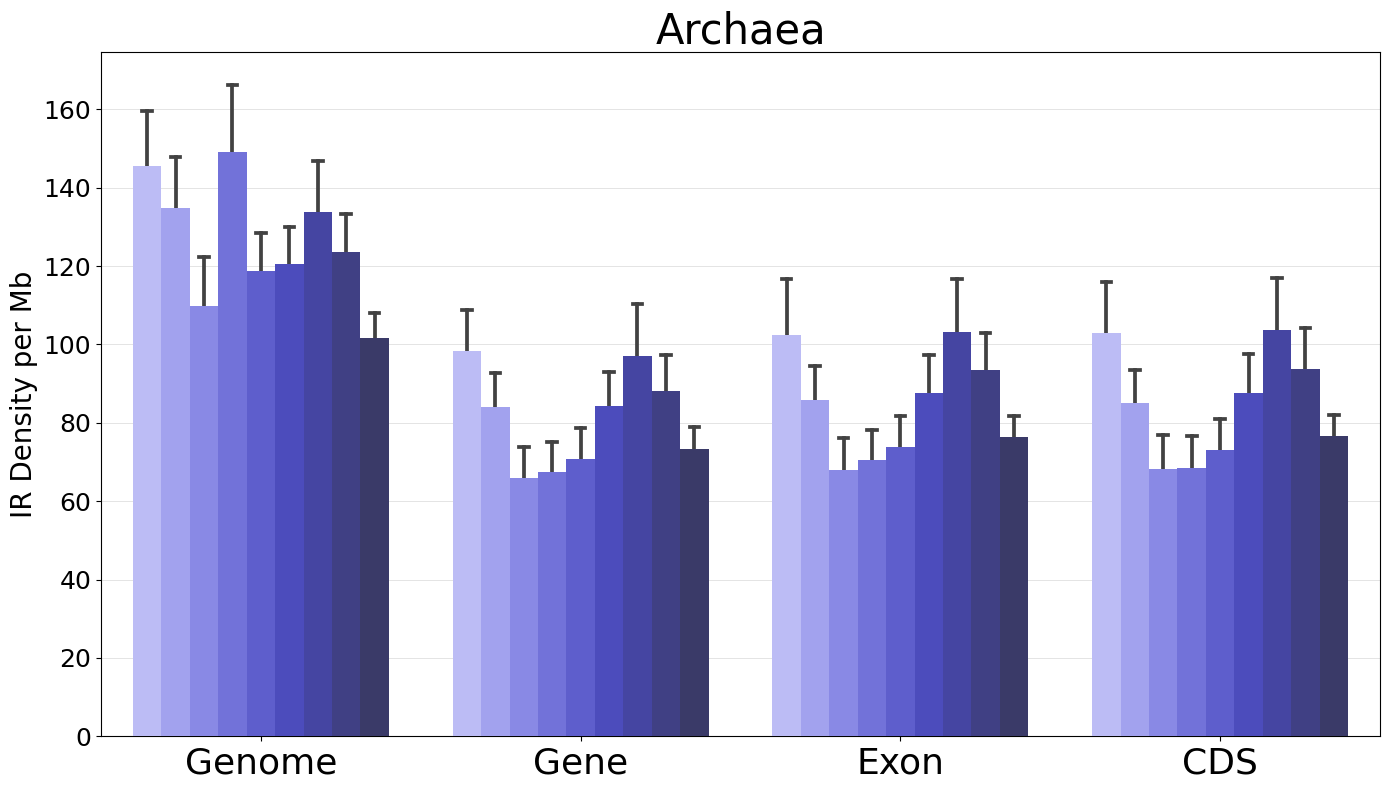

Eukaryota


/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


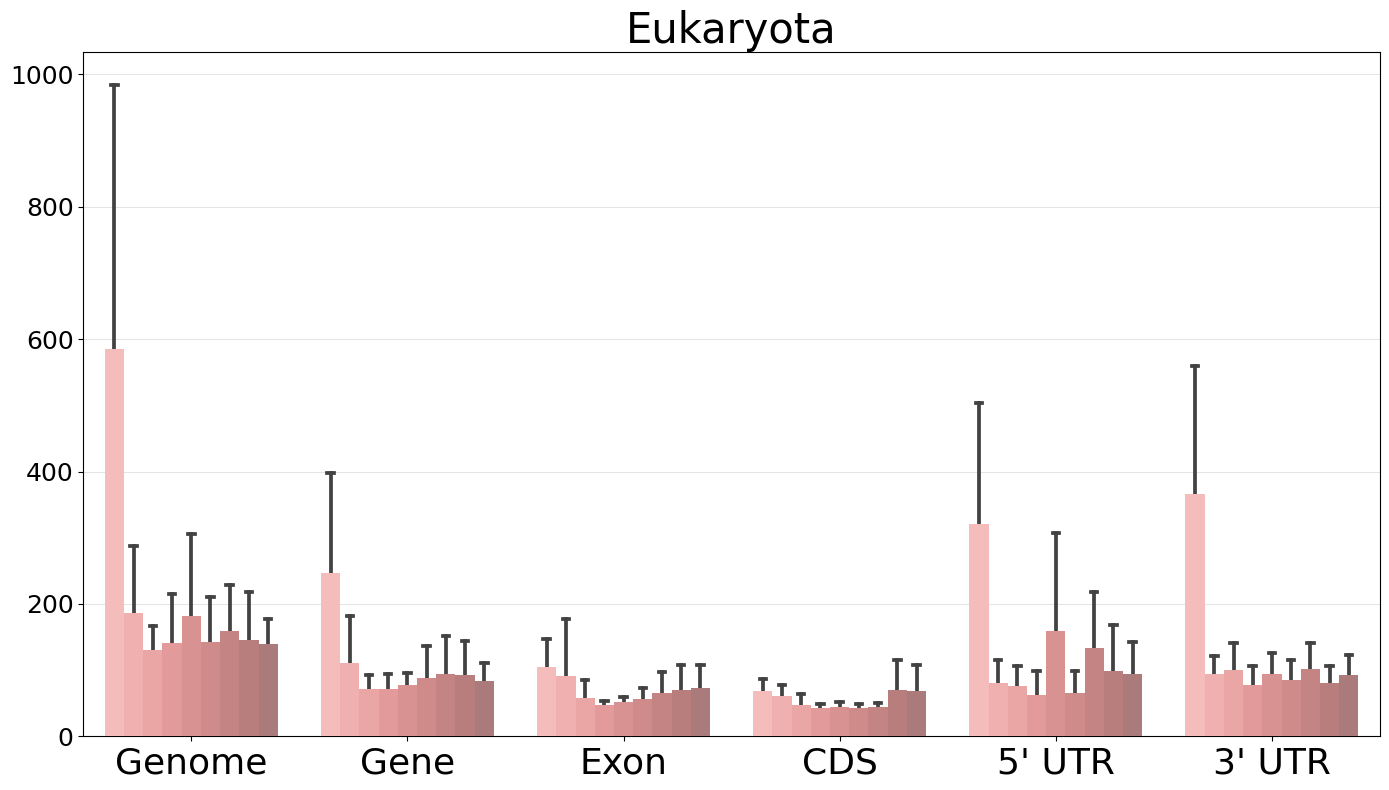

Bacteria


/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


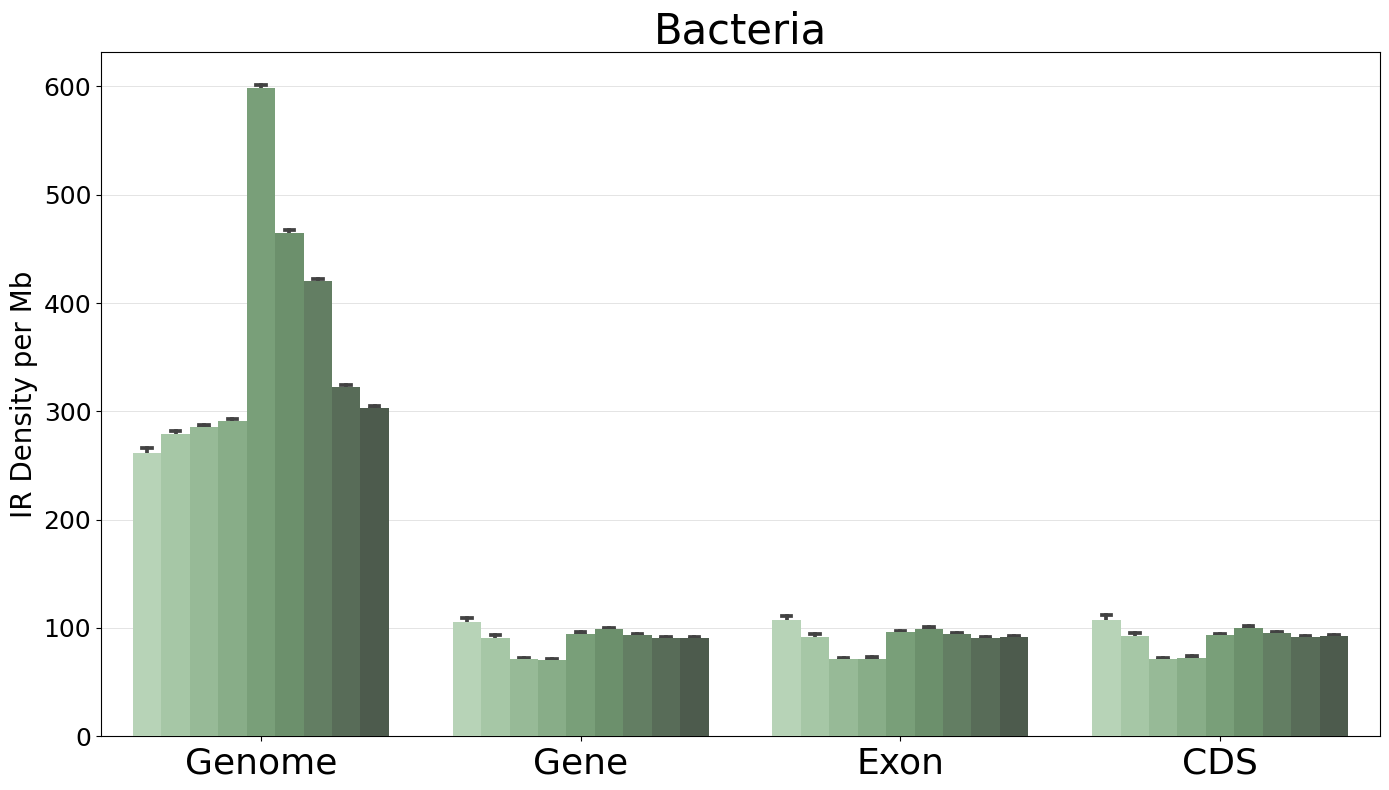

Viruses


/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


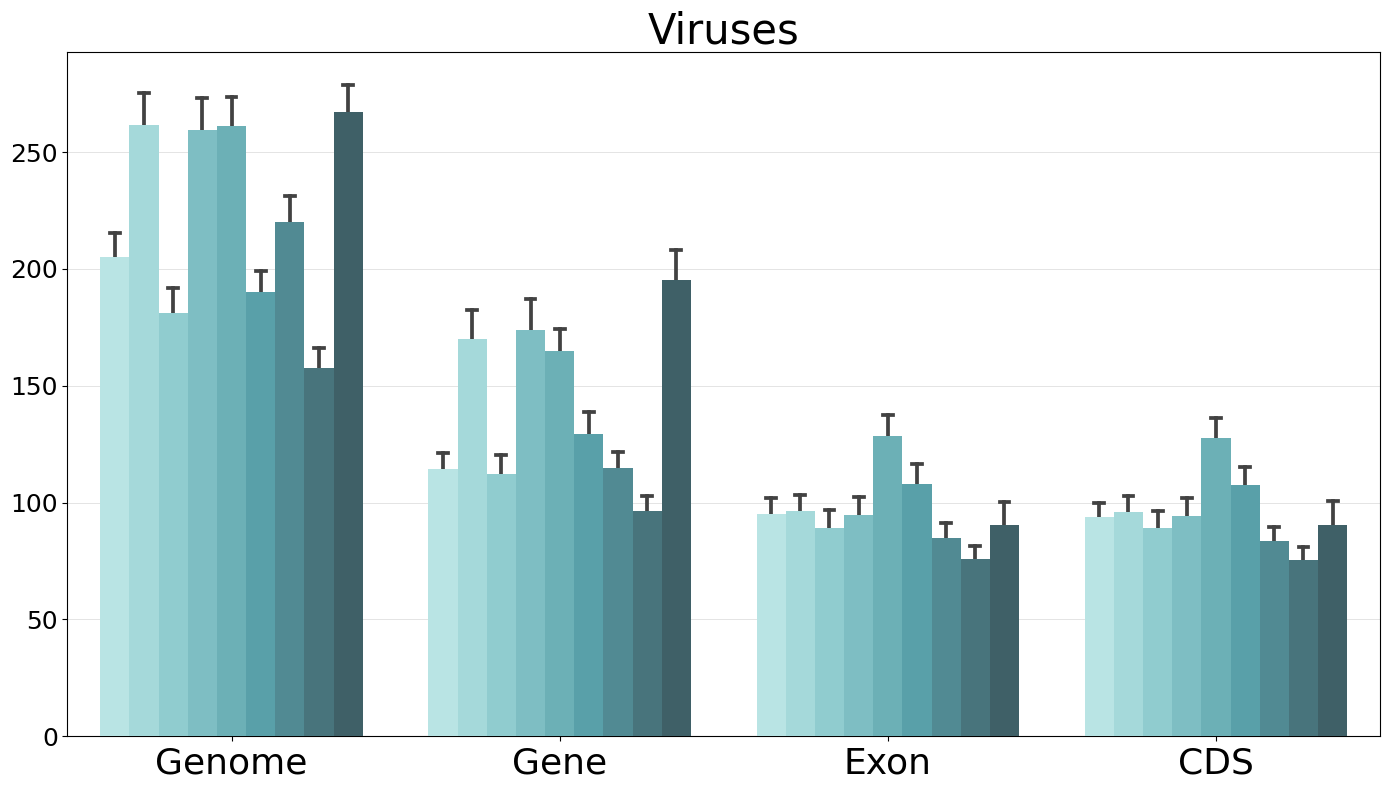

In [41]:
import math
from matplotlib.colors import TwoSlopeNorm

for domain in domains:
    print(domain)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
    ax.grid(lw=0.4, alpha=0.6, zorder=0)
    data = cov_df_compartments.query(f"superkingdom == '{domain}' & spacerLength != 'all'")

    if domain == "Eukaryota":
        order = ["Genome", "Gene", "Exon", "CDS", "5' UTR", "3' UTR"]
    else:
        order = ["Genome", "Gene", "Exon", "CDS"]
        
    sns.barplot(data=data, 
                    x="compartment", 
                    y="totalCoverage", 
                    # dodge=False,
                    # yerr=temp['std_coverage'],
                    order=order,
                    palette=sru_colors[domain],
                    hue="spacerLength", 
                    zorder=3,
                capsize=.03,
                ax=ax
               )
    
    # ax.set_xticklabels(list(map(str, range(1, 10, 1))), minor=True)
    ax.set_title(domain)
    ax.title.set_size(30)
    ax.legend(handles=[], title="", loc=0, frameon=False)

    if domain == "Bacteria" or domain == "Viruses":
        ax.set_xlabel("Genomic Compartment")
    else:
        ax.set_xlabel("")
        
    if domain == "Archaea" or domain == "Bacteria":
        ax.set_ylabel("IR Density per Mb")
    else:
        ax.set_ylabel("")

    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(20)
    ax.set_xlabel("")
    ax.tick_params(axis="both", which="major", labelsize=18)
    ax.tick_params(axis="x", which="major", labelsize=26)
    
    # target = figures.joinpath(f"compartments_coverage")
    # target.mkdir(exist_ok=True)
    # fig.savefig(target.joinpath(f"{domain}_average_compartment_density.png"), bbox_inches='tight')
    plt.tight_layout()
    fig.savefig(f"{DATABASE}/IR_density_compartments_various_spacers_{domain}.png", format="png", bbox_inches='tight')
    plt.show()
    plt.close()

In [54]:
kingdom_color_palette_eukaryota = {
                                   "Fungi": '#bc87de',
                                   "Plantae": "#d667c2",
                                   "Animalia": "#c3e352",
                                   "Protista": "#f0ab6c"
                                  }
kingdom_color_palette_eukaryota

{'Fungi': '#bc87de',
 'Plantae': '#d667c2',
 'Animalia': '#c3e352',
 'Protista': '#f0ab6c'}

In [14]:
domain_colors

{'Viruses': '#6bb5c7',
 'Eukaryota': '#e69c3c',
 'Archaea': '#b2b2ff',
 'Bacteria': '#a3c4a3'}

In [15]:
from colour import Color

def construct_color_palette():
    until = {"Fungi": "#624773",
             "Plantae": "#6b3461",
             "Animalia": "#65752a",
             "Protista": "#855e3a"
        }
    sru_colors = {}
    for kingdom in kingdom_color_palette_eukaryota:
        c = Color(kingdom_color_palette_eukaryota[kingdom])
        colors = list(map(str, c.range_to(Color(until[kingdom]), 10)))
        
        sru_colors.update({kingdom: {str(i): colors[i] for i in range(0, 9)}})
    return sru_colors

In [16]:
kingdom_colors = construct_color_palette()
kingdom_colors

NameError: name 'kingdom_color_palette_eukaryota' is not defined

In [ ]:
eukaryotic_kingdoms = cov_df_compartments.query("superkingdom == 'Eukaryota'")['kingdom'].unique()
eukaryotic_kingdoms

Fungi


/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


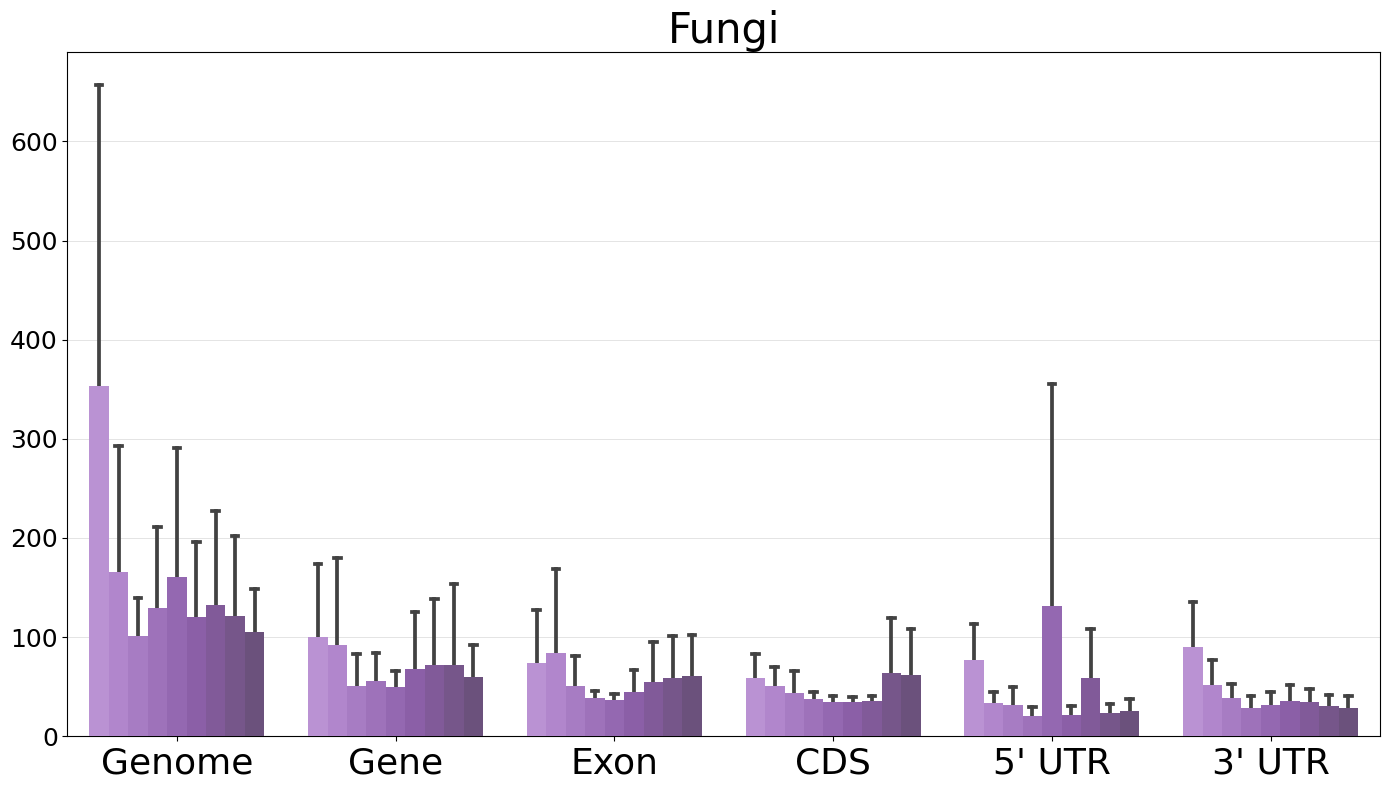

Animalia


/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


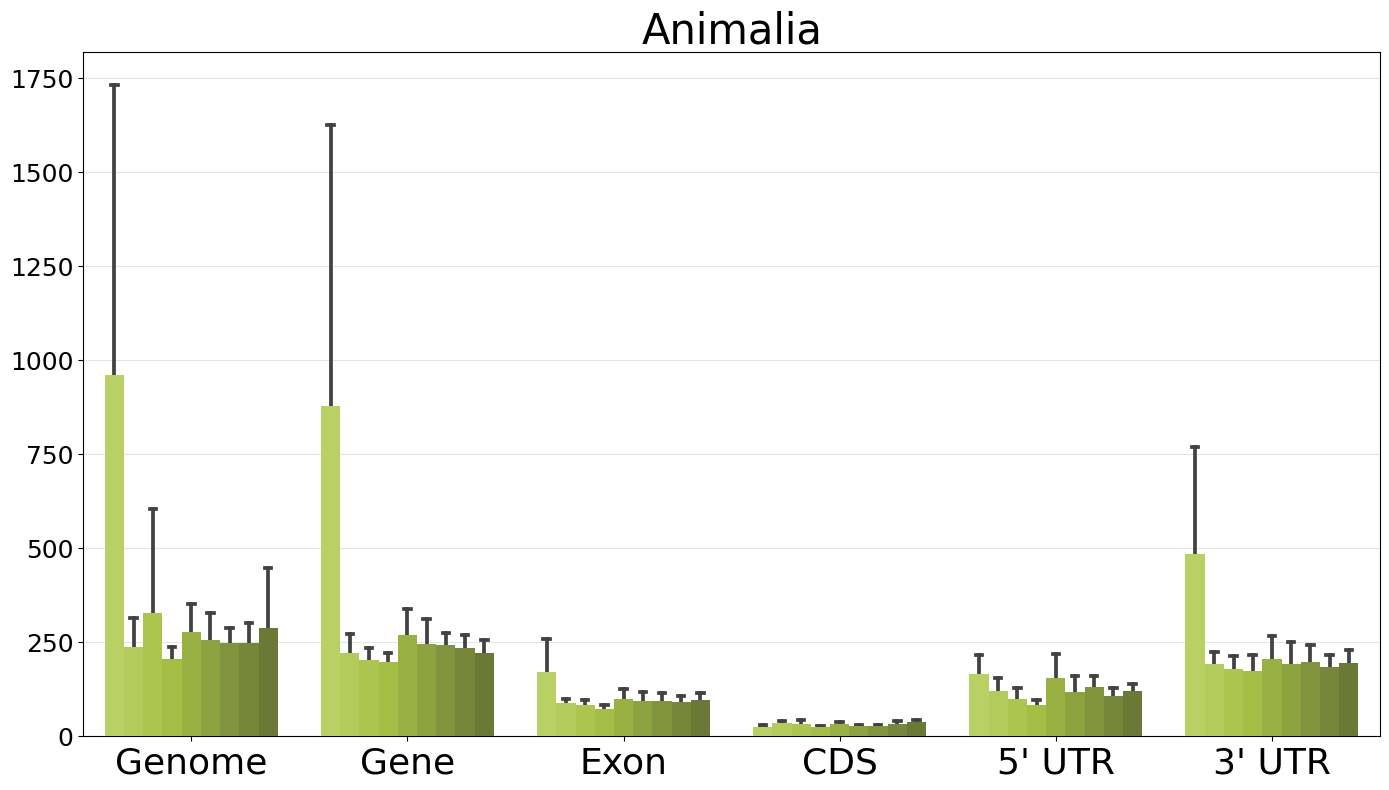

Plantae


/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


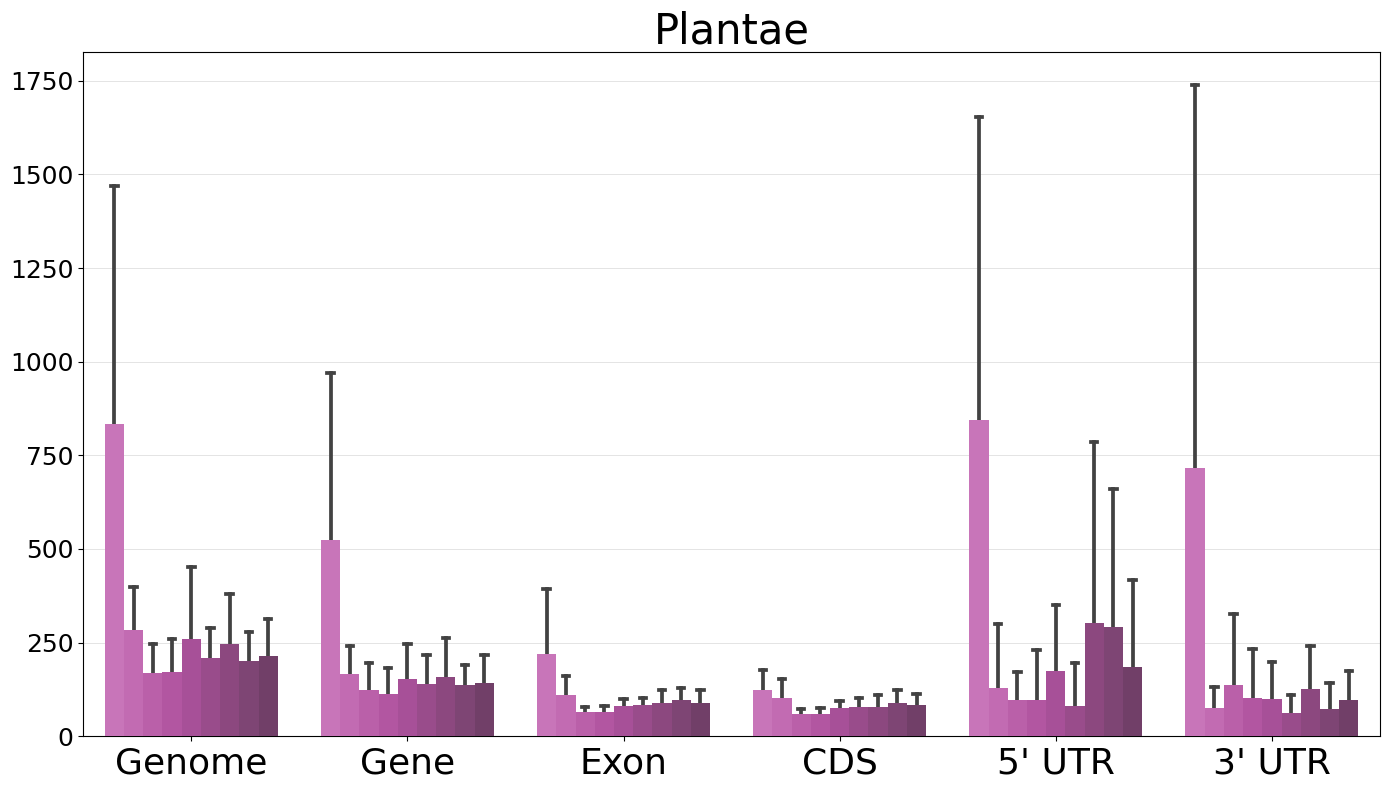

Protista


/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


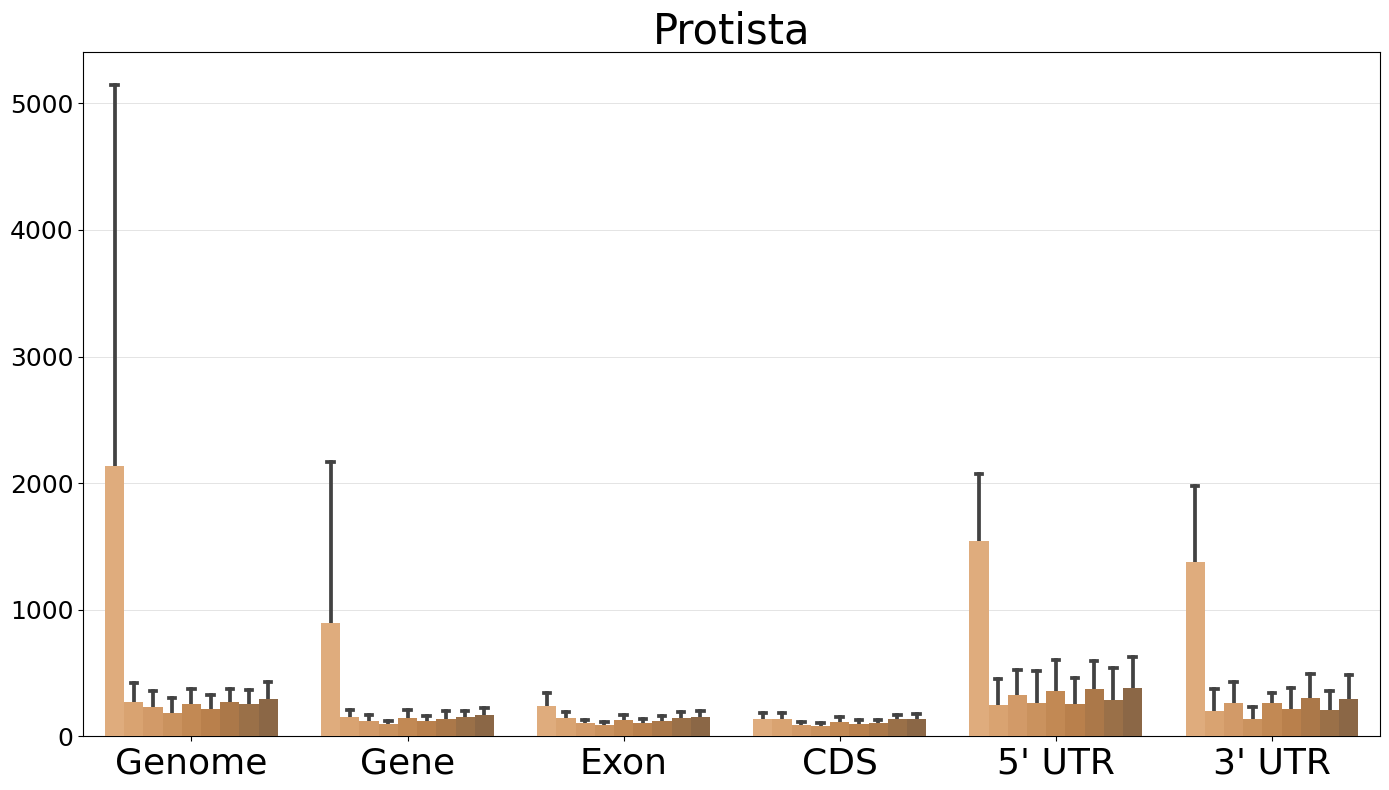

In [59]:
import math
from matplotlib.colors import TwoSlopeNorm

for kingdom in eukaryotic_kingdoms:
    print(kingdom)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
    ax.grid(lw=0.4, alpha=0.6, zorder=0)
    data = cov_df_compartments.query(f"kingdom == '{kingdom}' & spacerLength != 'all'")

    order = ["Genome", "Gene", "Exon", "CDS", "5' UTR", "3' UTR"]
    sns.barplot(data=data, 
                    x="compartment", 
                    y="totalCoverage", 
                    # dodge=False,
                    # yerr=temp['std_coverage'],
                    order=order,
                    palette=kingdom_colors[kingdom],
                    hue="spacerLength", 
                    zorder=3,
                capsize=.03,
                ax=ax
               )
    
    # ax.set_xticklabels(list(map(str, range(1, 10, 1))), minor=True)
    ax.set_title(kingdom)
    ax.title.set_size(30)
    ax.legend(handles=[], title="", loc=0, frameon=False)

    if domain == "Plantae" or domain == "Fungi":
        ax.set_xlabel("Genomic Compartment")
    else:
        ax.set_xlabel("")
        
    if domain == "Animalia" or domain == "Protista":
        ax.set_ylabel("IR Density per Mb")
    else:
        ax.set_ylabel("")

    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(20)
    ax.set_xlabel("")
    ax.tick_params(axis="both", which="major", labelsize=18)
    ax.tick_params(axis="x", which="major", labelsize=26)
    
    # target = figures.joinpath(f"compartments_coverage")
    # target.mkdir(exist_ok=True)
    # fig.savefig(target.joinpath(f"{domain}_average_compartment_density.png"), bbox_inches='tight')
    plt.tight_layout()
    fig.savefig(f"{DATABASE}/IR_density_compartments_various_spacers_{kingdom}.png", format="png", bbox_inches='tight')
    plt.show()
    plt.close()

In [17]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data = cov_df_all.query(f"biotype != '.'")
data["biotype"] = data["biotype"].replace("non_coding", "Non Coding")\
                                 .replace("protein_coding", "Protein Coding")

/tmp/ipykernel_3233998/3932886800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["biotype"] = data["biotype"].replace("non_coding", "Non Coding")\


In [82]:
protein_coding[~protein_coding['#assembly_accession'].isin(non_coding['#assembly_accession'])]

,#assembly_accession,spacerLength,compartment,biotype,compartmentLength,totalCompartments,bpCovering,atLeastOne,totalHits,totalCoverage,overlapping,averageCoverage,medianCoverage,minCoverage,maxCoverage,genome_size,phylum,kingdom,superkingdom,coverage
798,GCF_030864355.1,all,Gene,Protein Coding,13496504,7753,4824,196,199,357.426,2.528,344.694,0.00,0.0,61111.1,2.023733e+07,Basidiomycota,Fungi,Eukaryota,431.726827
1007,GCF_034447905.1,all,Gene,Protein Coding,30538426,15627,8354,325,344,273.557,2.080,277.329,0.00,0.0,64516.1,5.175081e+07,Ascomycota,Fungi,Eukaryota,506.678040
1077,GCF_005498985.1,all,Gene,Protein Coding,12379641,6591,2033,80,83,164.221,1.214,138.371,0.00,0.0,41666.7,1.956585e+07,Basidiomycota,Fungi,Eukaryota,258.767215
1927,GCF_026873545.1,all,Gene,Protein Coding,24000086,14574,4567,184,188,190.291,1.263,215.032,0.00,0.0,103658.5,5.356309e+07,Ascomycota,Fungi,Eukaryota,1649.288779
2218,GCA_024114885.1,all,Gene,Protein Coding,18893438,13096,3162,123,130,167.360,0.939,147.688,0.00,0.0,75757.6,3.955250e+07,Ascomycota,Fungi,Eukaryota,1426.256206
2537,GCF_000143535.2,all,Gene,Protein Coding,26464720,11698,7597,299,330,287.061,2.556,289.362,0.00,0.0,44401.5,4.263007e+07,Ascomycota,Fungi,Eukaryota,1120.265683
3607,GCA_033807595.1,all,Gene,Protein Coding,13134014,7899,2072,85,86,157.758,1.076,146.972,0.00,0.0,55666.0,2.305034e+07,Ascomycota,Fungi,Eukaryota,257.696805
4398,GCA_026184415.1,all,Gene,Protein Coding,16029805,9102,5320,194,237,331.882,2.131,321.025,0.00,0.0,51391.9,3.351017e+07,Ascomycota,Fungi,Eukaryota,1175.075963
6488,GCF_020509005.1,all,Gene,Protein Coding,20387633,14993,2370,96,97,116.247,0.640,136.287,0.00,0.0,161812.3,6.716917e+07,Ascomycota,Fungi,Eukaryota,1081.701668
6838,GCA_026914245.1,all,Gene,Protein Coding,25780218,12690,40271,617,1360,1562.089,4.862,725.582,0.00,0.0,180740.7,1.211141e+08,Basidiomycota,Fungi,Eukaryota,5545.969873


In [84]:
for domain in domains:
    temp = data[data['superkingdom'] == domain]
    for spacerLength in list(range(9)) + ["all"]:
        tempu = temp[temp['spacerLength'] == str(spacerLength)]
        protein_coding = tempu.query("biotype == 'Protein Coding'")
        non_coding = tempu.query("biotype == 'Non Coding'")

        mutual_assemblies = set(protein_coding['#assembly_accession']).intersection(set(non_coding['#assembly_accession']))
        
        protein_coding = protein_coding[protein_coding['#assembly_accession'].isin(mutual_assemblies)]
        non_coding = non_coding[non_coding['#assembly_accession'].isin(mutual_assemblies)]
        assert tempu.shape[0] > 0
        
        print(domain, spacerLength, protein_coding.shape[0], non_coding.shape[0], mannwhitneyu(protein_coding['totalCoverage'], non_coding['totalCoverage']))

Archaea 0 651 651 MannwhitneyuResult(statistic=397815.5, pvalue=7.599756167252843e-188)
Archaea 1 651 651 MannwhitneyuResult(statistic=367411.0, pvalue=1.691714909473335e-128)
Archaea 2 651 651 MannwhitneyuResult(statistic=382820.5, pvalue=5.697456002617118e-161)
Archaea 3 651 651 MannwhitneyuResult(statistic=305451.0, pvalue=5.075591722991764e-47)
Archaea 4 651 651 MannwhitneyuResult(statistic=349474.0, pvalue=2.4559890123523134e-102)
Archaea 5 651 651 MannwhitneyuResult(statistic=374611.5, pvalue=1.523618810654543e-144)
Archaea 6 651 651 MannwhitneyuResult(statistic=382436.0, pvalue=3.786231120254724e-160)
Archaea 7 651 651 MannwhitneyuResult(statistic=382393.0, pvalue=2.7607295256644785e-160)
Archaea 8 651 651 MannwhitneyuResult(statistic=398517.0, pvalue=8.607650353691368e-194)
Archaea all 651 651 MannwhitneyuResult(statistic=264636.5, pvalue=3.303227731610337e-15)
Eukaryota 0 170 170 MannwhitneyuResult(statistic=22431.0, pvalue=1.5761691183289934e-19)
Eukaryota 1 170 170 Mannwhitn

In [78]:
non_coding

,#assembly_accession,spacerLength,compartment,biotype,compartmentLength,totalCompartments,bpCovering,atLeastOne,totalHits,totalCoverage,overlapping,averageCoverage,medianCoverage,minCoverage,maxCoverage,genome_size,phylum,kingdom,superkingdom,coverage
13293,GCF_000006805.1,0,Gene,Non Coding,32979,99,96,4,4,2910.943,4.04,1010.931,0.0,0.0,24767.8,2571010.0,Euryarchaeota,Archaeabacteria,Archaea,4650.701475
13893,GCF_000007005.1,0,Gene,Non Coding,186475,332,0,0,0,0.000,0.00,0.000,0.0,0.0,0.0,2992245.0,Thermoproteota,Archaeabacteria,Archaea,770.658820
14073,GCF_000007065.1,0,Gene,Non Coding,84785,140,0,0,0,0.000,0.00,0.000,0.0,0.0,0.0,4096345.0,Euryarchaeota,Archaeabacteria,Archaea,1296.765775
14433,GCF_000007185.1,0,Gene,Non Coding,15136,49,0,0,0,0.000,0.00,0.000,0.0,0.0,0.0,1694969.0,Euryarchaeota,Archaeabacteria,Archaea,462.545333
14553,GCF_000007225.1,0,Gene,Non Coding,28729,75,0,0,0,0.000,0.00,0.000,0.0,0.0,0.0,2222430.0,Thermoproteota,Archaeabacteria,Archaea,341.968026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804973,GCF_963668475.1,0,Gene,Non Coding,23655,75,0,0,0,0.000,0.00,0.000,0.0,0.0,0.0,3926859.0,Euryarchaeota,Archaeabacteria,Archaea,588.765729
5805513,GCF_963674485.1,0,Gene,Non Coding,23750,75,0,0,0,0.000,0.00,0.000,0.0,0.0,0.0,3380489.0,Euryarchaeota,Archaeabacteria,Archaea,1265.201573
5808213,GCF_963677065.1,0,Gene,Non Coding,13660,58,0,0,0,0.000,0.00,0.000,0.0,0.0,0.0,3173737.0,Euryarchaeota,Archaeabacteria,Archaea,1829.389140
5810193,GCF_963678545.1,0,Gene,Non Coding,18348,62,0,0,0,0.000,0.00,0.000,0.0,0.0,0.0,3328399.0,Euryarchaeota,Archaeabacteria,Archaea,1468.273485


In [77]:
protein_coding

,#assembly_accession,spacerLength,compartment,biotype,compartmentLength,totalCompartments,bpCovering,atLeastOne,totalHits,totalCoverage,overlapping,averageCoverage,medianCoverage,minCoverage,maxCoverage,genome_size,phylum,kingdom,superkingdom,coverage
13294,GCF_000006805.1,0,Gene,Protein Coding,2251711,2651,1454,58,59,645.731,2.188,557.876,0.0,0.0,34456.9,2571010.0,Euryarchaeota,Archaeabacteria,Archaea,4650.701475
13894,GCF_000007005.1,0,Gene,Protein Coding,2396451,2876,60,3,3,25.037,0.104,49.286,0.0,0.0,63492.1,2992245.0,Thermoproteota,Archaeabacteria,Archaea,770.658820
14074,GCF_000007065.1,0,Gene,Protein Coding,3050024,3364,106,6,6,34.754,0.178,39.437,0.0,0.0,30303.0,4096345.0,Euryarchaeota,Archaeabacteria,Archaea,1296.765775
14434,GCF_000007185.1,0,Gene,Protein Coding,1517516,1775,90,6,6,59.307,0.338,65.184,0.0,0.0,28871.4,1694969.0,Euryarchaeota,Archaeabacteria,Archaea,462.545333
14554,GCF_000007225.1,0,Gene,Protein Coding,1946036,2562,64,3,3,32.887,0.117,19.255,0.0,0.0,12220.0,2222430.0,Thermoproteota,Archaeabacteria,Archaea,341.968026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804974,GCF_963668475.1,0,Gene,Protein Coding,3389834,3551,86,4,4,25.370,0.113,36.682,0.0,0.0,56980.1,3926859.0,Euryarchaeota,Archaeabacteria,Archaea,588.765729
5805514,GCF_963674485.1,0,Gene,Protein Coding,2857621,3251,114,7,7,39.893,0.215,44.380,0.0,0.0,26246.7,3380489.0,Euryarchaeota,Archaeabacteria,Archaea,1265.201573
5808214,GCF_963677065.1,0,Gene,Protein Coding,2711986,3037,112,5,5,41.298,0.165,54.987,0.0,0.0,51792.8,3173737.0,Euryarchaeota,Archaeabacteria,Archaea,1829.389140
5810194,GCF_963678545.1,0,Gene,Protein Coding,2817186,3176,135,8,8,47.920,0.252,36.467,0.0,0.0,28268.6,3328399.0,Euryarchaeota,Archaeabacteria,Archaea,1468.273485


<Axes: ylabel='Frequency'>

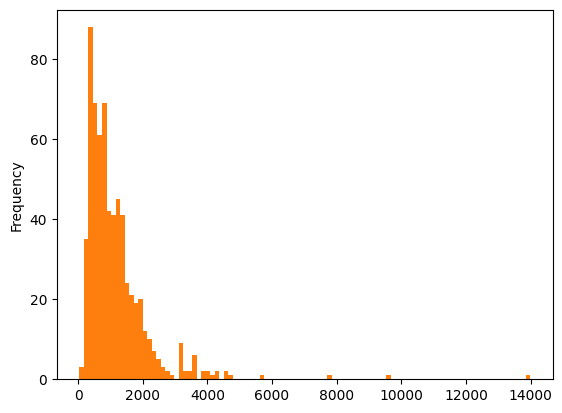

In [76]:
protein_coding['coverage'].plot(kind="hist", bins=100)
non_coding['coverage'].plot(kind="hist", bins=100)

/tmp/ipykernel_3233998/1590850469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["biotype"] = data["biotype"].replace("non_coding", "Non Coding")\
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/iz

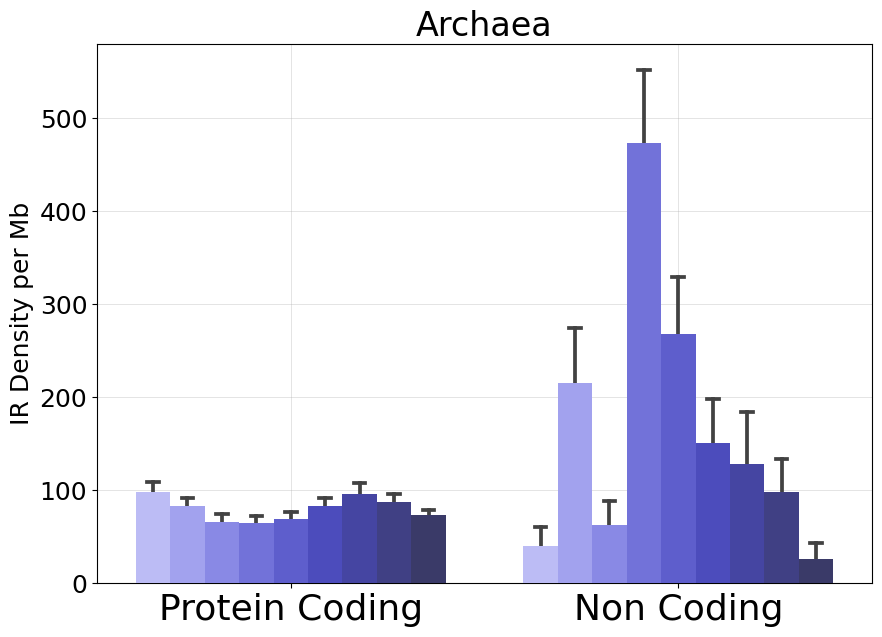

/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


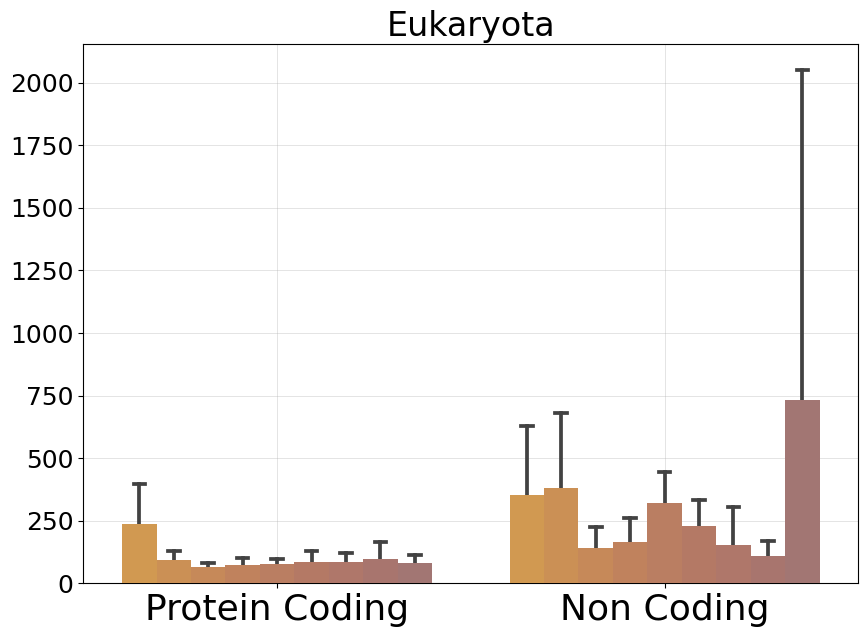

/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


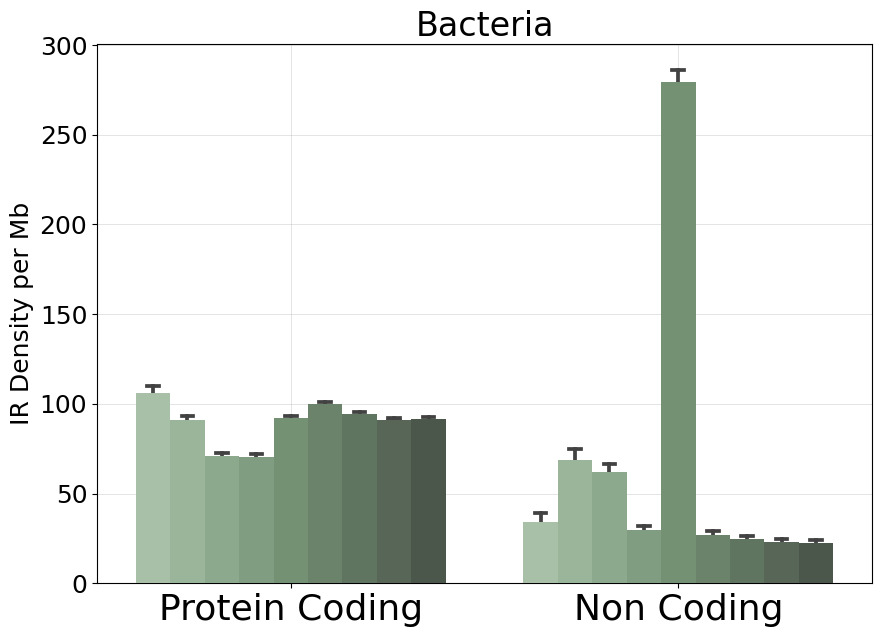

/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


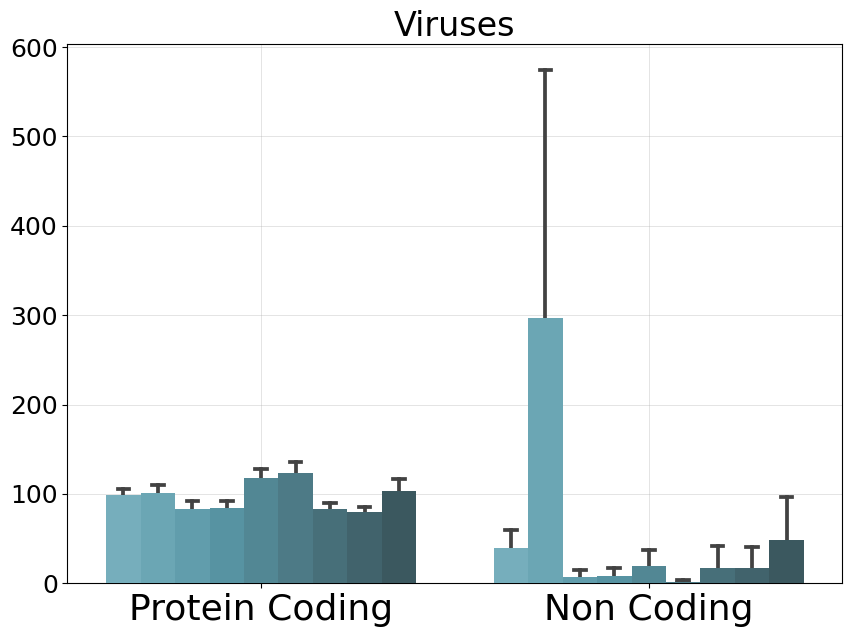

In [31]:
data = cov_df_all.query(f"spacerLength != 'all' & biotype != '.'")
data["biotype"] = data["biotype"].replace("non_coding", "Non Coding")\
                                 .replace("protein_coding", "Protein Coding")


for domain in domains:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
    temp = data[data['superkingdom'] == domain]
    
    sns.barplot(
            data=temp,
            y="totalCoverage",
            hue="spacerLength",
            x="biotype",
            capsize=0.03,
            ax=ax,
            palette=sru_colors[domain],
            order=["Protein Coding", "Non Coding"],
            zorder=3,  
            # order=["Genome", "gene", "exon", "CDS"],
        )
    ax.grid(lw=0.4, alpha=0.6, zorder=0)
    ax.legend(title="", 
                prop={"size": 14}, 
              bbox_to_anchor=(1.05, 0.7)
             )
      # ax.set_xticklabels(list(map(str, range(1, 10, 1))), minor=True)
    ax.set_title(domain)
    ax.title.set_size(24)
    ax.legend(handles=[], title="", loc=0, frameon=False)

    if domain == "Bacteria" or domain == "Viruses":
        ax.set_xlabel("Gene Biotype")
    else:
        ax.set_xlabel("")
        
    if domain == "Archaea" or domain == "Bacteria":
        ax.set_ylabel("IR Density per Mb")
    else:
        ax.set_ylabel("")

    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(18)
    ax.set_xlabel("")
    ax.tick_params(axis="both", which="major", labelsize=18)
    ax.tick_params(axis="x", which="major", labelsize=26)
    fig.savefig(f"{DATABASE}/IR_density_compartments_gene_biotype_various_spacers_{domain}.png", format="png", bbox_inches='tight')

    plt.show()
    plt.close()

/tmp/ipykernel_982453/713803287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["biotype"] = data["biotype"].replace("non_coding", "Non Coding")\
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5

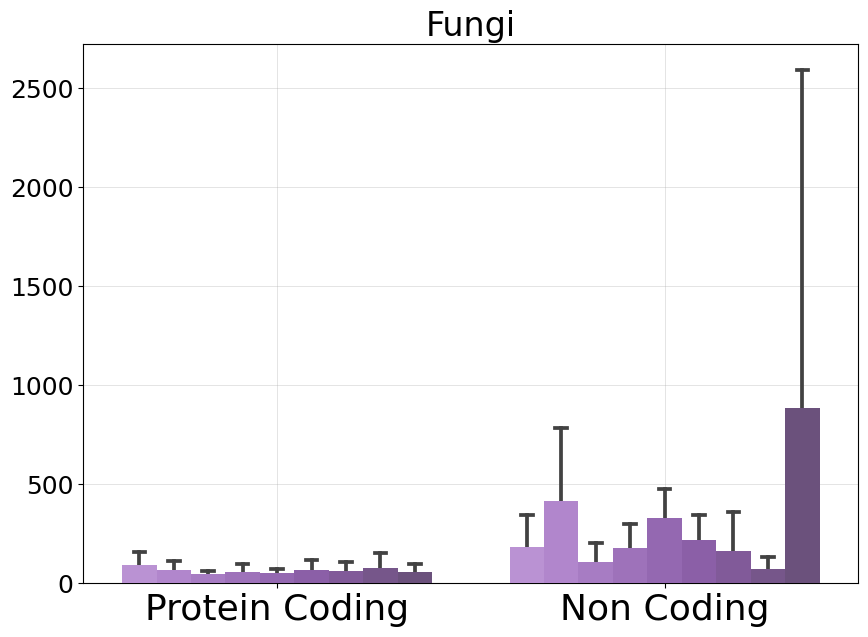

/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


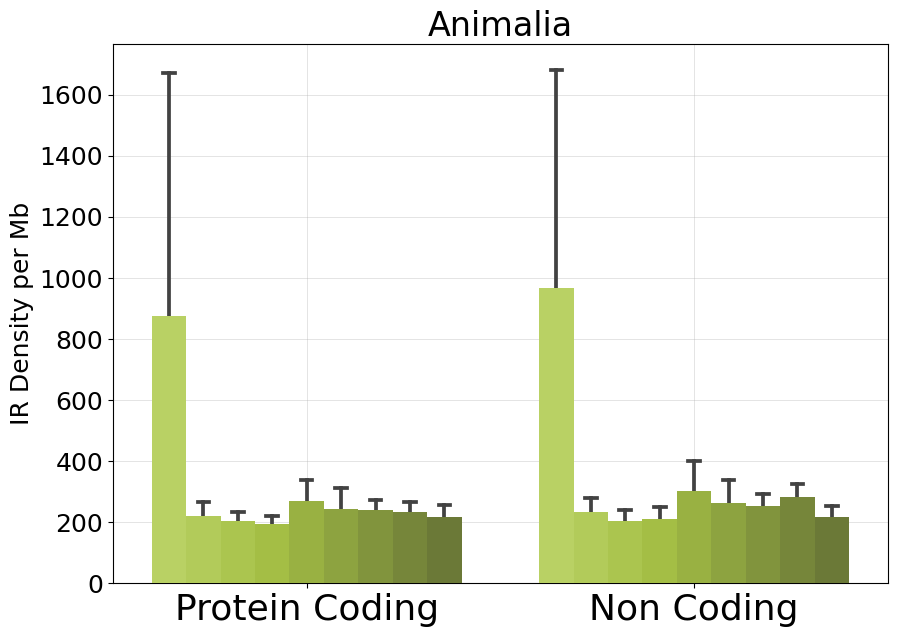

/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


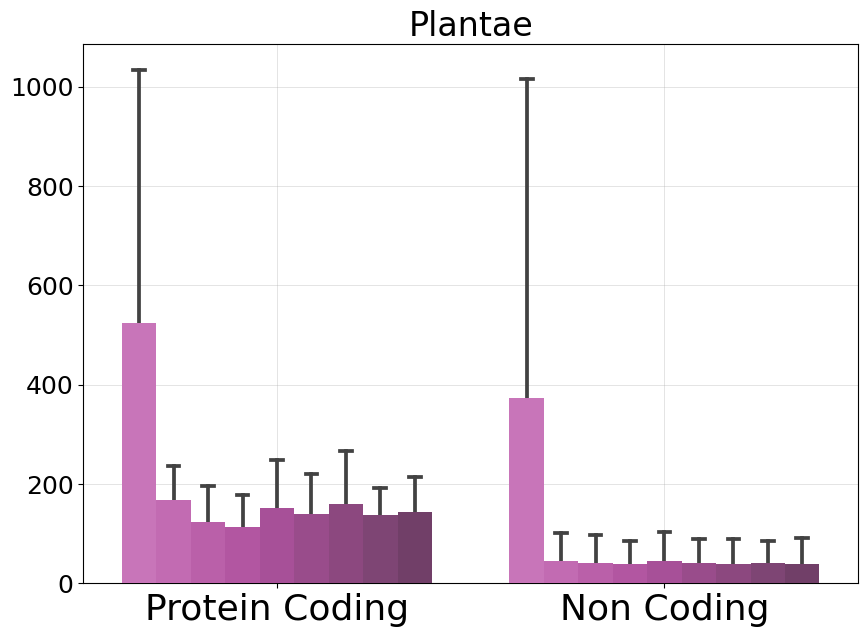

/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


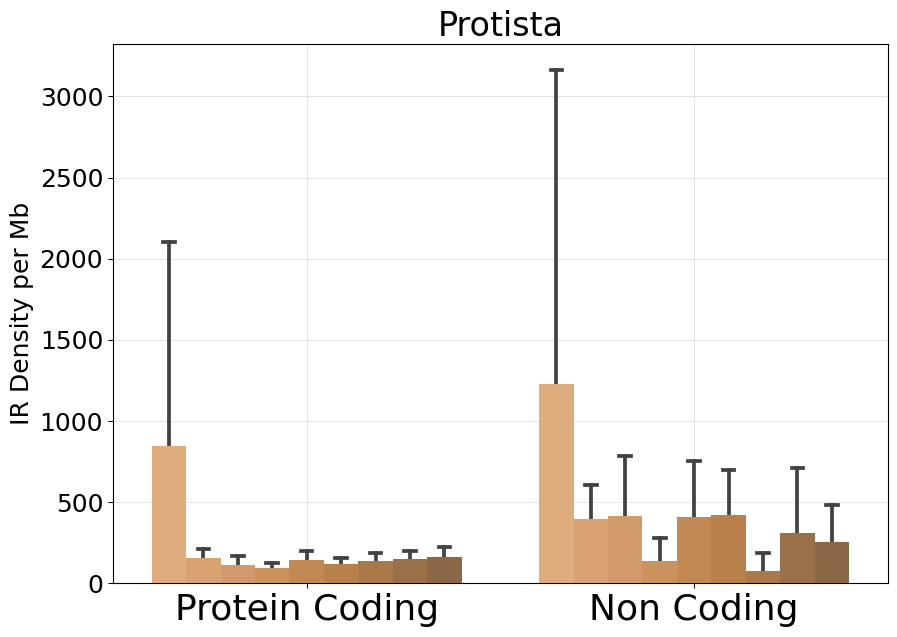

In [61]:
data = cov_df_all.query(f"spacerLength != 'all' & biotype != '.'")
data["biotype"] = data["biotype"].replace("non_coding", "Non Coding")\
                                 .replace("protein_coding", "Protein Coding")


for kingdom in eukaryotic_kingdoms:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
    temp = data[data['kingdom'] == kingdom]
    
    sns.barplot(
            data=temp,
            y="totalCoverage",
            hue="spacerLength",
            x="biotype",
            capsize=0.03,
            ax=ax,
            palette=kingdom_colors[kingdom],
            order=["Protein Coding", "Non Coding"],
            zorder=3,  
            # order=["Genome", "gene", "exon", "CDS"],
        )
    ax.grid(lw=0.4, alpha=0.6, zorder=0)
    ax.legend(title="", 
                prop={"size": 14}, 
              bbox_to_anchor=(1.05, 0.7)
             )
      # ax.set_xticklabels(list(map(str, range(1, 10, 1))), minor=True)
    ax.set_title(kingdom)
    ax.title.set_size(24)
    ax.legend(handles=[], title="", loc=0, frameon=False)

    if kingdom == "Plantae" or kingdom == "Fungi":
        ax.set_xlabel("Gene Biotype")
    else:
        ax.set_xlabel("")
        
    if kingdom == "Protista" or kingdom == "Animalia":
        ax.set_ylabel("IR Density per Mb")
    else:
        ax.set_ylabel("")

    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(18)
    ax.set_xlabel("")
    ax.tick_params(axis="both", which="major", labelsize=18)
    ax.tick_params(axis="x", which="major", labelsize=26)
    fig.savefig(f"{DATABASE}/IR_density_compartments_gene_biotype_various_spacers_{kingdom}.png", format="png", bbox_inches='tight')

    plt.show()
    plt.close()

Viruses


/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


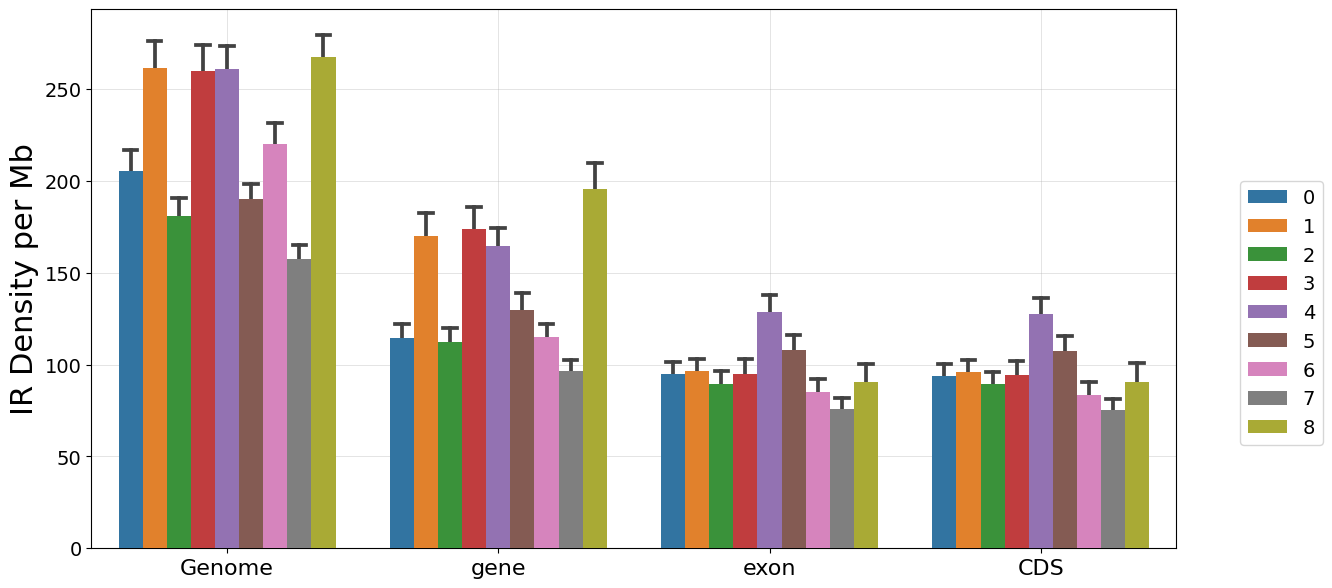

In [37]:
for domain in domain_colors:
    print(domain)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
    data = cov_df_compartments.query(f"superkingdom == '{domain}' & spacerLength != 'all'")

    sns.barplot(
                data=data,
                y="totalCoverage",
                hue="spacerLength",
                x="compartment",
                capsize=0.05,
                ax=ax,
                # palette=domain_colors,
                # order=['Bacteria', 'Viruses', 'Eukaryota', 'Archaea'],
                zorder=3,  
                order=["Genome", "gene", "exon", "CDS"],
            )
    
    ax.legend(title="", prop={"size": 14}, bbox_to_anchor=(1.05, 0.7))
    ax.tick_params(axis="y", labelsize=14)
    ax.tick_params(axis="x", labelsize=16)
    ax.grid(lw=0.4, alpha=0.6, zorder=0)
    ax.set_ylabel("IR Density per Mb")
    ax.set_xlabel("")
    ax.yaxis.label.set_size(22)
    plt.show()
    plt.close()
    break



## Phylum Level Analysis

In [98]:
import math
domains = ["Archaea", "Eukaryota", "Bacteria", "Viruses"]
domain_colors = {
                 'Viruses': '#6bb5c7',
                 'Eukaryota': '#e69c3c',
                 'Archaea': '#b2b2ff',
                 'Bacteria': '#a3c4a3'
            }

kingdom_color_palette = {
                         "Viruses": "#6bb5c7",
                         "Bacteria": "#0fbf2d",
                         "Archaea": "#b2b2ff",
                         "Fungi": "#4d325e",
                         "Plantae": "#b50996",
                         "Eubacteria": "#0fbf2d",
                         "Animalia": "#9bba2d",
                         "Protista": "#c78f5b",
                         "Archaeabacteria": "#7b7bed",
                } 

phylum_df = cov_df_compartments.query("spacerLength == 'all'")\
            .dropna(subset=['phylum'])\
            .groupby(["compartment", "phylum"], as_index=False)\
            .agg({
                  "totalCoverage": "mean", 
                  "superkingdom": "first", 
                  "kingdom": "first"
                 })

phylum_df['totalCoverage'] = phylum_df['totalCoverage'].apply(lambda y: math.log(y+1, 10))
phylum_df

,compartment,phylum,totalCoverage,superkingdom,kingdom
0,3' UTR,Apicomplexa,3.645759,Eukaryota,Protista
1,3' UTR,Arthropoda,3.459721,Eukaryota,Animalia
2,3' UTR,Ascomycota,2.538969,Eukaryota,Fungi
3,3' UTR,Basidiomycota,2.718321,Eukaryota,Fungi
4,3' UTR,Chlorophyta,3.054395,Eukaryota,Plantae
...,...,...,...,...,...
475,Genome,Uroviricota,3.117859,Viruses,Viruses
476,Genome,Verrucomicrobiota,3.327907,Bacteria,Eubacteria
477,Genome,Vulcanimicrobiota,3.400684,Bacteria,Eubacteria
478,Genome,candidate division NC10,3.123431,Bacteria,Eubacteria


In [99]:
kingdom_color_palette

{'Viruses': '#6bb5c7',
 'Bacteria': '#0fbf2d',
 'Archaea': '#b2b2ff',
 'Fungi': '#4d325e',
 'Plantae': '#b50996',
 'Eubacteria': '#0fbf2d',
 'Animalia': '#9bba2d',
 'Protista': '#c78f5b',
 'Archaeabacteria': '#7b7bed'}

In [100]:
domain_colors

{'Viruses': '#6bb5c7',
 'Eukaryota': '#e69c3c',
 'Archaea': '#b2b2ff',
 'Bacteria': '#a3c4a3'}

In [117]:
phylum_domain_mapping = phylum_df[["phylum", "superkingdom"]].set_index("phylum")['superkingdom'].to_dict()
phylum_kingdom_mapping = phylum_df[["phylum", "kingdom"]].set_index("phylum")['kingdom'].to_dict()

In [124]:
phylum_df.loc[:, 'kingdom'] = phylum_df['kingdom'].apply(lambda x: 'Viruses' if x not in {
                                                                                   'Fungi', 
                                                                                   'Plantae', 
                                                                                   'Eubacteria', 
                                                                                   'Archaeabacteria', 
                                                                                   'Animalia', 
                                                                                   'Protista'
                                                                                  } else x
                                                 )

phylum_df.loc[:, "super_color"] = phylum_df['superkingdom'].map(domain_colors)
phylum_df.loc[:, "kingdom_color"] = phylum_df['kingdom'].map(kingdom_color_palette)


pivot_phylum = phylum_df.pivot(
                               index='phylum', 
                               columns='compartment', 
                               values='totalCoverage'
                        )[["Genome", "Gene", "Exon", "CDS"]]

pivot_phylum.loc[:, "super_color"] = pivot_phylum.index.map(lambda x: domain_colors[phylum_domain_mapping[x]])
pivot_phylum.loc[:, "kingdom_color"] = pivot_phylum.index.map(lambda x: kingdom_color_palette[phylum_kingdom_mapping[x]])

domain_col = pivot_phylum.pop("super_color")
kingdom_col = pivot_phylum.pop("kingdom_color")

pivot_phylum = pivot_phylum.fillna(-1.0)
pivot_phylum

compartment,Genome,Gene,Exon,CDS
phylum,,,,
Abditibacteriota,3.495572,2.862487,2.862487,2.861749
Acidobacteriota,3.267512,2.773983,2.775821,2.776306
Actinomycetota,3.457758,3.055252,3.057396,3.058961
Apicomplexa,3.751265,3.423654,3.168409,3.108365
Aquificota,2.786699,2.551016,2.550439,2.529486
...,...,...,...,...
Uroviricota,3.117859,2.806087,2.703419,2.703785
Verrucomicrobiota,3.327907,2.796859,2.789280,2.792245
Vulcanimicrobiota,3.400684,3.320580,3.314752,3.315953


In [128]:
!cp /storage/group/izg5139/default/nicole/TandemRepeats/TandemTelomeres.ipynb .

In [126]:
DATABASE

'/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/final_figures'

In [129]:
DATABASE

'/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/final_figures'

/tmp/ipykernel_982453/3394631424.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('viridis')
/tmp/ipykernel_982453/3394631424.py:77: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


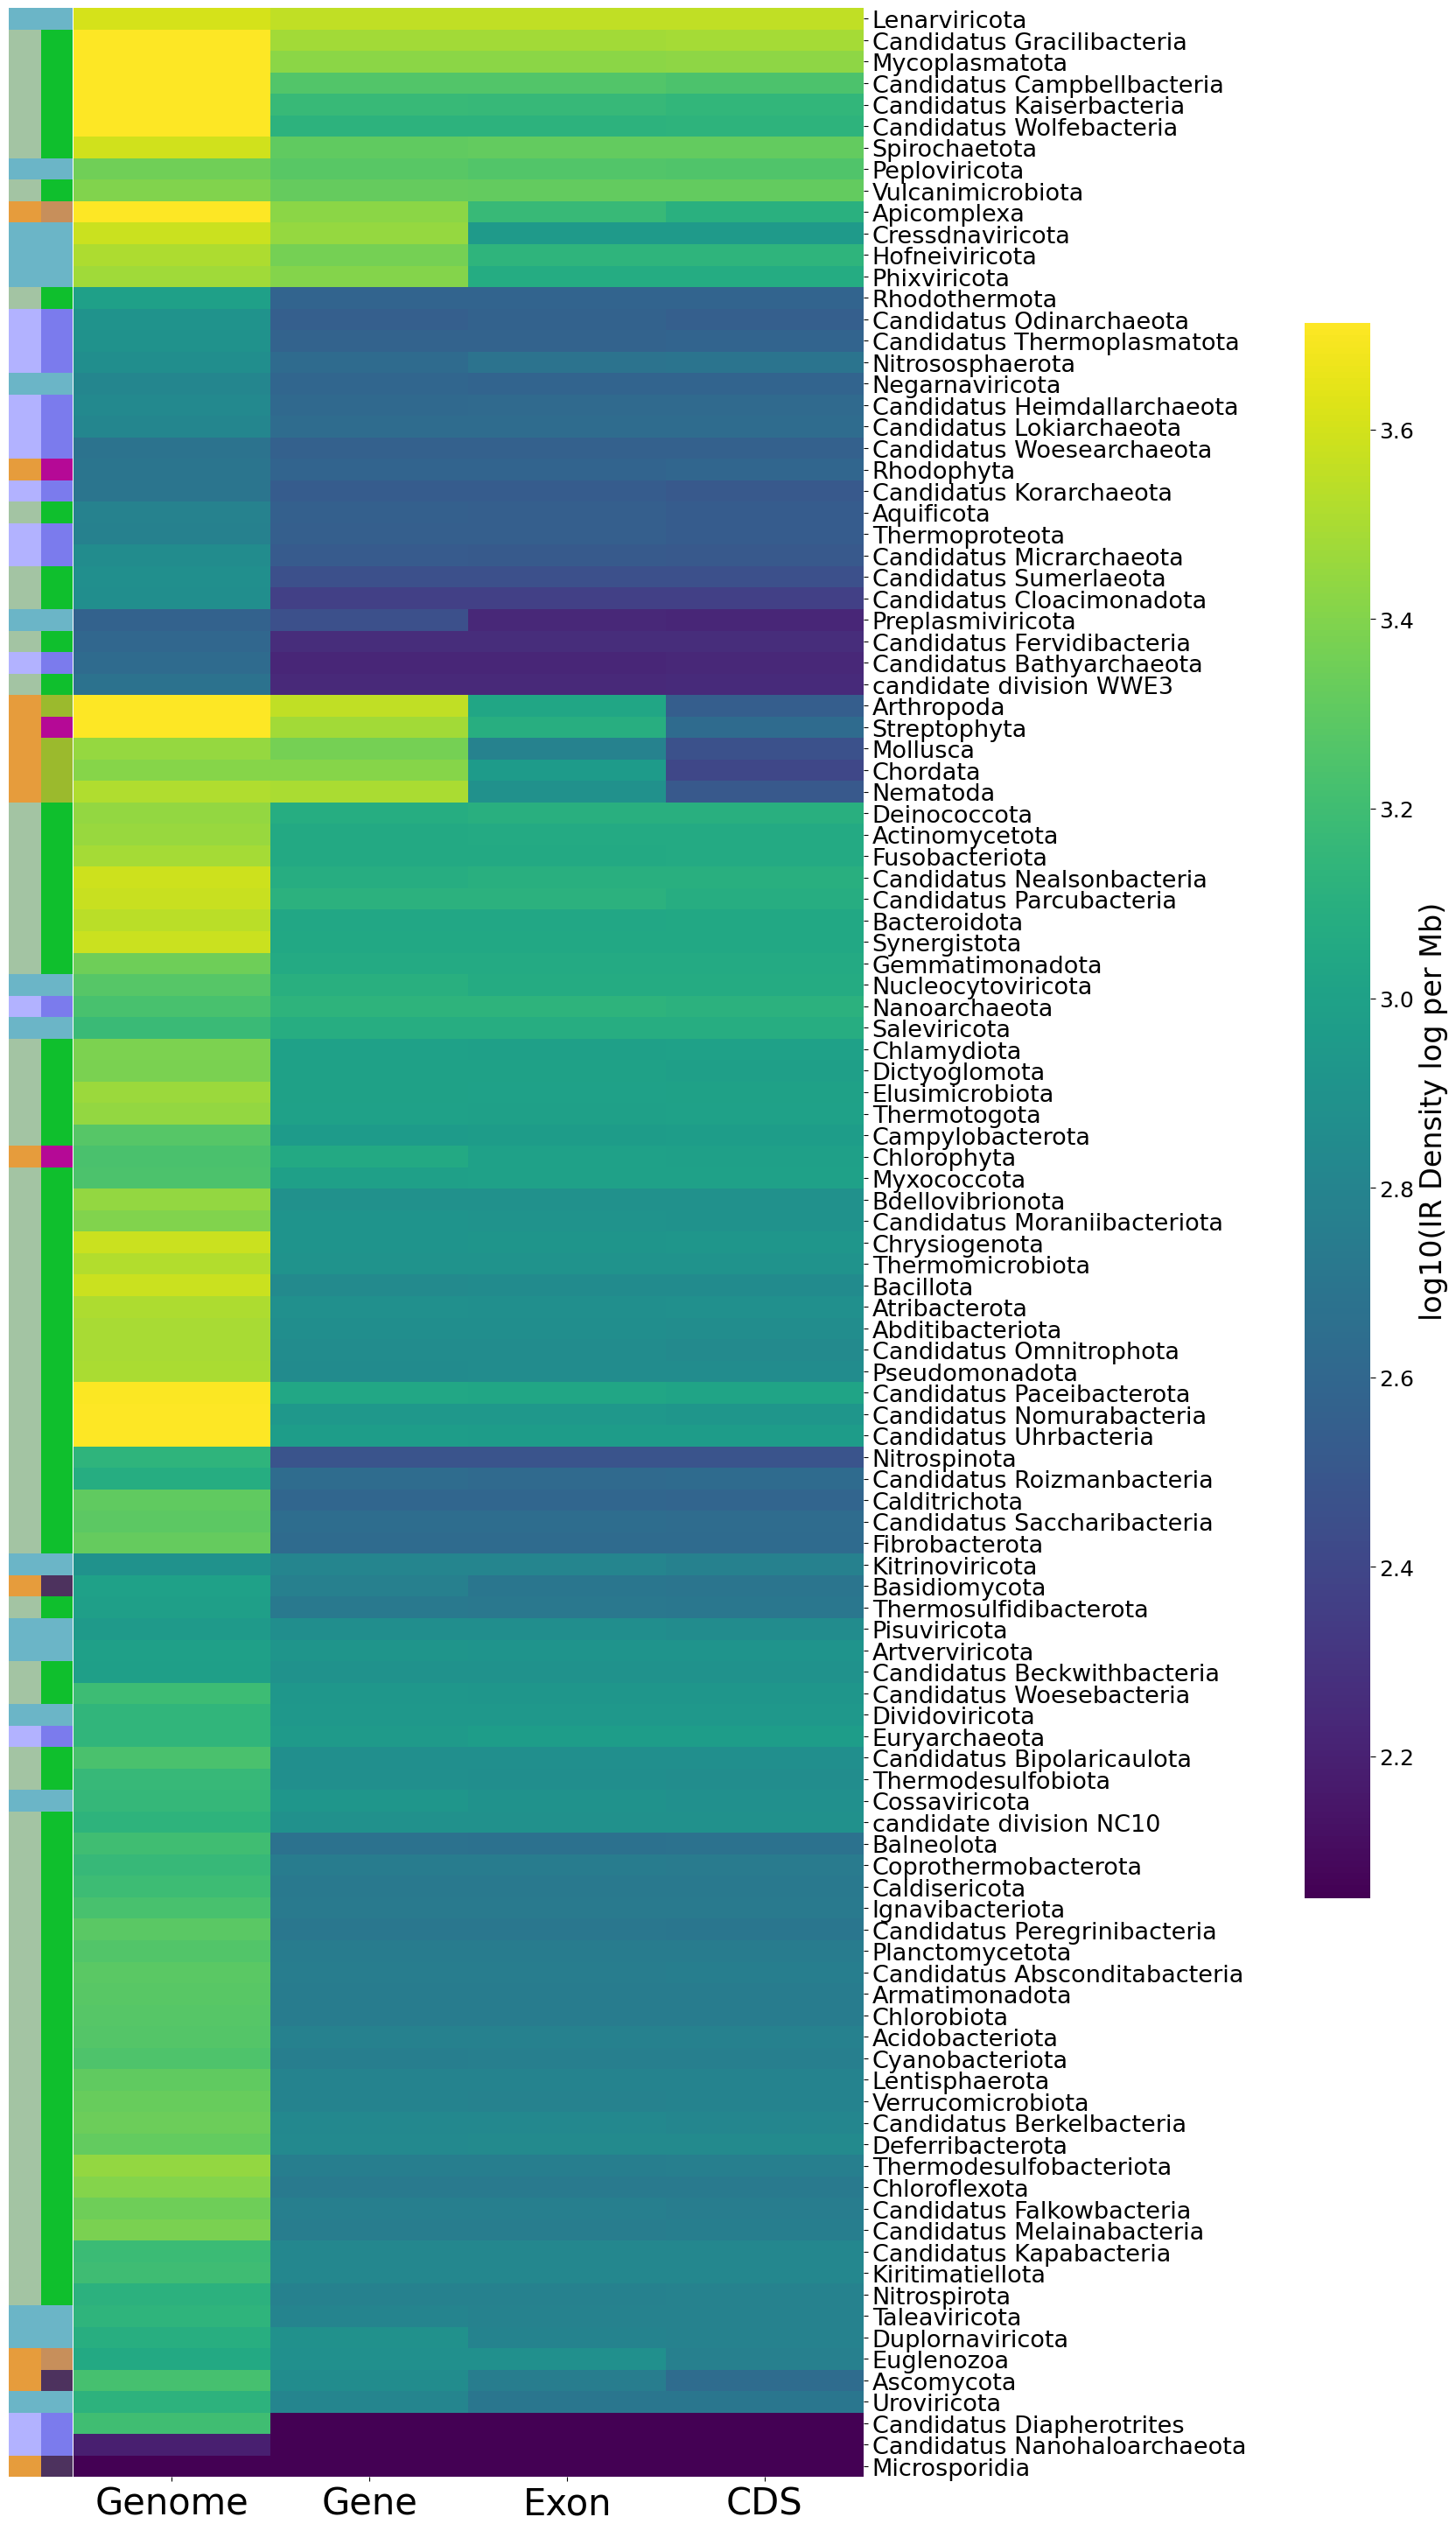

In [125]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
kws = dict(cbar_kws=dict(location="top", shrink=0.2))

figsize=(15, 36)
compartments = ["Genome", "Gene", "Exon", "CDS"]

# .apply(lambda x: math.log(x+1, 10))
cmap = matplotlib.cm.get_cmap('viridis')
cmap.set_bad("#cdd4cf")
mask = np.where(pivot_phylum==-1, True, False)

    
cg = sns.clustermap(
                  pivot_phylum,
                   row_colors=[domain_col, kingdom_col],
                   row_cluster=True, 
                   col_cluster=False,
                   #method="average",
                    # vmax=1.0,
                    cmap=cmap,
                    mask=mask,
                   figsize=figsize,
                   robust=True,
                   yticklabels=True, 
                   xticklabels=True,
                   cbar_kws={"shrink": 0.1, "orientation": "vertical"}
                   )
ax = cg.ax_heatmap


cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
ax = cg.ax_heatmap
ax.set_xlabel("")
# ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_ylabel("")
# ax.set_title("Phylum")
# ax.title.set_size(16)
t = ax.xaxis.get_majorticklocs()
# origin = "TSS" if ts == "start" else "TES"
# ax.set_xticks(range(len(t)), [{
#                                len(t)//2: origin, 
#                                0: -500, 
#                                len(t)//2 + len(t)//4: 250, 
#                                len(t)//4: -250, 
#                                len(t)-1: 500
#                               }.get(i, "") for i in range(len(t))])
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis="both", 
               which="major", 
               labelsize=19.5,
               rotation=0
              )
ax.tick_params(axis="x", 
               which="major", 
               labelsize=30,
               rotation=0
              )

# Customize colorbar properties
x0, _y0, _w, _h = cg.cbar_pos
cg.ax_cbar.set_position([1.16, 0.2, 0.05, 0.5])
# cg.cax.set_position([0.075, 0.2, 0.04, 0.65])  # Adjust the position of the colorbar
cg.ax_cbar.tick_params(axis='both', length=4, labelsize=18)

# Add a label to the colorbar
cg.cax.set_ylabel('log10(IR Density log per Mb)', size=24) #, labelpad=15, size=12)
for spine in cg.ax_cbar.spines:
    cg.ax_cbar.spines[spine].set_color('black')
    # cg.ax_cbar.spines[spine].set_linewidth(2)


plt.tight_layout()
fig = plt.gcf()
fig.savefig(f"{DATABASE}/clustermap_phylum_IR_sequences.png", bbox_inches='tight')
plt.show()

In [2]:
EMPTY_ASSEMBLIES_PATH = os.getenv("EMPTY_ASSEMBLIES")
empty_assemblies = pd.read_csv(EMPTY_ASSEMBLIES_PATH)
empty_assemblies

,#assembly_accession,assembly_id,organism_name,assembly_level,genome_size,group,species_taxid,phylum,kingdom,superkingdom,total_a,total_t,total_g,total_c,total_n,gc_proportion,gc_percent,genome_size_corr
0,GCA_006445955.1,G006445955,Human adenovirus E4,Complete Genome,35960,viral,130308,Preplasmiviricota,Bamfordvirae,Viruses,8136,7579,10050,10195,0,0.562987,56.0,35960
1,GCF_002818485.1,G002818485,Torque teno mini virus 12,Complete Genome,2912,viral,3048398,NaN,Unclassified Viruses,Viruses,1074,699,483,656,0,0.391140,39.0,2912
2,GCA_002997485.1,G002997485,Microbacterium phage Bonino,Complete Genome,41534,viral,2560593,Uroviricota,Heunggongvirae,Viruses,7372,7848,13145,13169,0,0.633553,63.0,41534
3,GCA_004197275.1,G004197275,Circular genetic element sp.,Complete Genome,2015,viral,2202954,NaN,Unclassified Viruses,Viruses,582,606,428,399,0,0.410422,41.0,2015
4,GCA_012948885.1,G012948885,Marine virus AFVG_250M985,Complete Genome,40193,viral,2694215,NaN,Unclassified Viruses,Viruses,11040,11483,8356,9314,0,0.439629,43.5,40193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30871,GCA_902992545.1,G902992545,uncultured Caudovirales phage,Complete Genome,15196,viral,2100421,Uroviricota,Heunggongvirae,Viruses,3659,4501,3391,3645,0,0.463017,46.0,15196
30872,GCA_004062815.1,G004062815,Porcine circovirus 2,Complete Genome,1768,viral,3048279,Cressdnaviricota,Shotokuvirae,Viruses,448,462,365,493,0,0.485294,48.5,1768
30873,GCA_022788595.1,G022788595,Human mastadenovirus B,Complete Genome,35088,viral,108098,Preplasmiviricota,Bamfordvirae,Viruses,8906,8311,8858,9013,0,0.509319,50.5,35088
30874,GCA_031315335.1,G031315335,Tomato alphanucleorhabdovirus 1,Complete Genome,13405,viral,2950883,Negarnaviricota,Orthornavirae,Viruses,4099,3649,2933,2724,0,0.422007,42.0,13405


In [3]:
chromosomes_summary = pd.read_csv("/storage/group/izg5139/default/nicole/inverted_repeats/frogtools/metadata/chromosomal_summary.txt")
chromosomes_summary

,#assembly_accession,chromosome,chromosome_bp,a,g,c,t,gc_content,n
0,GCA_000006845.1,AE004969.1,2153922,506423,568286,566608,512605,1134894,0
1,GCA_000006925.2,AE005674.2,4607202,1133784,1167963,1176618,1128831,2344581,6
2,GCA_000006925.2,AF386526.1,221618,59302,51858,49570,60888,101428,0
3,GCA_000007025.1,AE006914.1,1268755,427325,207088,204481,429861,411569,0
4,GCA_000007085.1,AE008691.1,2689445,837915,504663,505786,841081,1010449,0
...,...,...,...,...,...,...,...,...,...
233078,GCF_902150665.1,NC_049394.1,30927,7343,7164,8758,7662,15922,0
233079,GCF_902150695.1,NC_049953.1,47224,11808,12668,11147,11601,23815,0
233080,GCF_902150705.1,NC_073087.1,44825,10387,12519,11959,9960,24478,0
233081,GCF_904067185.1,NC_070650.1,265389,74303,61222,58751,71113,119973,0


In [4]:
genome_sizes = chromosomes_summary.groupby("#assembly_accession").agg(genome_size=("chromosome_bp", "sum"),
                                                                        a=("a", "sum"),
                                                                        g=("g", "sum"),
                                                                        c=("c", "sum"),
                                                                        t=("t", "sum"),
                                                                        n=("n", "sum")
                                                                     )
genome_sizes

,genome_size,a,g,c,t,n
#assembly_accession,,,,,,
GCA_000006845.1,2153922,506423,568286,566608,512605,0
GCA_000006865.1,2365589,765914,420487,415261,763927,0
GCA_000006925.2,4828820,1193086,1219821,1226188,1189719,6
GCA_000007025.1,1268755,427325,207088,204481,429861,0
GCA_000007085.1,2689445,837915,504663,505786,841081,0
...,...,...,...,...,...,...
GCF_963422545.1,5236164,1746691,874797,875557,1739119,0
GCF_963457545.1,2359279,755294,417128,419840,767017,0
GCF_963457575.1,4103361,686346,1351533,1382211,683271,0


In [5]:
from tqdm import tqdm

compartment_metadata = []
for compartment in tqdm(["gene", "exon", "CDS"]):
    if compartment == "CDS":
        df = pd.read_csv(f"/storage/group/izg5139/default/nicole/inverted_repeats/frogtools/bed_files_CDS/overlap/{compartment}/{compartment}_overlap_statistics_irp.csv")
    else:
        df = pd.read_csv(f"/storage/group/izg5139/default/nicole/inverted_repeats/frogtools/bed_files/overlap/{compartment}/{compartment}_overlap_statistics_irp.csv")

    df.loc[:, "compartment"] = compartment
    compartment_metadata.append(df)

compartment_metadata = pd.concat(compartment_metadata, axis=0).merge(genome_sizes, left_on="#assembly_accession", right_index=True, how="left")\
                                                                        .query("total_compartment_bp <= genome_size")
compartment_metadata

100%|██████████| 3/3 [00:00<00:00, 15.16it/s]


,#assembly_accession,total_extragenic_overlap,total_intragenic_overlap,total_compartment_bp,overlapping_compartment_count,compartment,genome_size,a,g,c,t,n
15,GCA_000006845.1,1988,454,1766011,77,gene,2153922.0,506423.0,568286.0,566608.0,512605.0,0.0
16,GCA_000006865.1,2558,2718,2035878,179,gene,2365589.0,765914.0,420487.0,415261.0,763927.0,0.0
19,GCA_000006925.2,3038,834,3970197,86,gene,4828820.0,1193086.0,1219821.0,1226188.0,1189719.0,6.0
24,GCA_000007025.1,1333,103,1026539,49,gene,1268755.0,427325.0,207088.0,204481.0,429861.0,0.0
27,GCA_000007085.1,2247,2873,2435581,168,gene,2689445.0,837915.0,504663.0,505786.0,841081.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103482,GCF_961514395.1,993,741,3522734,62,CDS,4105500.0,901230.0,1156707.0,1152601.0,894962.0,0.0
103483,GCF_963311185.1,866,522,4353787,47,CDS,5066866.0,1527998.0,1002501.0,998040.0,1538327.0,0.0
103484,GCF_963378075.1,3588,145,4035325,137,CDS,4341397.0,680421.0,1483575.0,1496175.0,681226.0,0.0
103485,GCF_963378095.1,5747,293,5029881,227,CDS,5453374.0,878460.0,1848251.0,1845067.0,881596.0,0.0


In [6]:
irp_df = pd.read_csv("/storage/group/izg5139/default/nicole/inverted_repeats/paper_data/irp_database_transfer.csv.gz")
irp_df.shape


(24548026, 24)

In [7]:
irp_df.columns

Index(['speciesID', 'chromosome', 'start', 'end', 'arm_size', 'gap_size',
       'sequenceof_arm', '#assembly_accession', 'organism_name',
       'assembly_level', 'genome_size', 'group', 'species_taxid', 'phylum',
       'kingdom', 'superkingdom', 'total_a', 'total_t', 'total_g', 'total_c',
       'total_n', 'gc_proportion', 'genome_size_corr', 'gc_percent'],
      dtype='object')

In [13]:
grouped_data = irp_df.groupby("#assembly_accession").agg({"arm_size": lambda ds: ds.sum() * 2,
                                                          "gap_size": lambda ds: ds.sum(),
                                                          "organism_name": "first",
                                                           "phylum": "first",
                                                           "kingdom": "first",
                                                           "superkingdom": "first"
                                                         })\
                .assign(irp_total_bp=lambda df: df["arm_size"] + df["gap_size"])

# empty_assemblies = empty_assemblies.set_index("#assembly_accession")
empty_assemblies.loc[:, "arm_size"] = 0
empty_assemblies.loc[:, "gap_size"] = 0
empty_assemblies.loc[:, "irp_total_bp"] = 0
grouped_data = pd.concat([grouped_data, empty_assemblies[["arm_size", "gap_size", "organism_name", "phylum", "kingdom", "superkingdom", "irp_total_bp"]]], axis=0)
grouped_data.head()

,arm_size,gap_size,organism_name,phylum,kingdom,superkingdom,irp_total_bp
GCA_000006845.1,11470,1824,Neisseria gonorrhoeae FA 1090,Pseudomonadota,Eubacteria,Bacteria,13294
GCA_000006865.1,13388,2207,Lactococcus lactis subsp. lactis Il1403,Bacillota,Eubacteria,Bacteria,15595
GCA_000006925.2,11706,2354,Shigella flexneri 2a str. 301,Pseudomonadota,Eubacteria,Bacteria,14060
GCA_000007025.1,4410,707,Rickettsia conorii str. Malish 7,Pseudomonadota,Eubacteria,Bacteria,5117
GCA_000007085.1,7022,1311,Caldanaerobacter subterraneus subsp. tengconge...,Bacillota,Eubacteria,Bacteria,8333


In [14]:
compartment_metadata = grouped_data.reset_index().rename(columns={"index": "#assembly_accession"})\
                                    .merge(compartment_metadata, 
                                           left_on="#assembly_accession",
                                           right_on="#assembly_accession", 
                                           how="inner"
                                          )\
                                    .reset_index(drop=True)
compartment_metadata

,#assembly_accession,arm_size,gap_size,organism_name,phylum,kingdom,superkingdom,irp_total_bp,total_extragenic_overlap,total_intragenic_overlap,total_compartment_bp,overlapping_compartment_count,compartment,genome_size,a,g,c,t,n
0,GCA_000006845.1,11470,1824,Neisseria gonorrhoeae FA 1090,Pseudomonadota,Eubacteria,Bacteria,13294,1988,454,1766011,77,gene,2153922.0,506423.0,568286.0,566608.0,512605.0,0.0
1,GCA_000006845.1,11470,1824,Neisseria gonorrhoeae FA 1090,Pseudomonadota,Eubacteria,Bacteria,13294,0,0,22930,0,exon,2153922.0,506423.0,568286.0,566608.0,512605.0,0.0
2,GCA_000006845.1,11470,1824,Neisseria gonorrhoeae FA 1090,Pseudomonadota,Eubacteria,Bacteria,13294,1988,454,1743081,77,CDS,2153922.0,506423.0,568286.0,566608.0,512605.0,0.0
3,GCA_000006865.1,13388,2207,Lactococcus lactis subsp. lactis Il1403,Bacillota,Eubacteria,Bacteria,15595,2558,2718,2035878,179,gene,2365589.0,765914.0,420487.0,415261.0,763927.0,0.0
4,GCA_000006865.1,13388,2207,Lactococcus lactis subsp. lactis Il1403,Bacillota,Eubacteria,Bacteria,15595,2416,2670,1999434,174,CDS,2365589.0,765914.0,420487.0,415261.0,763927.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172432,GCF_963378095.1,8414,1315,Mycolicibacterium sp. MU0053,Actinomycetota,Eubacteria,Bacteria,9729,0,0,14006,0,exon,5453374.0,878460.0,1848251.0,1845067.0,881596.0,0.0
172433,GCF_963378095.1,8414,1315,Mycolicibacterium sp. MU0053,Actinomycetota,Eubacteria,Bacteria,9729,5747,293,5029881,227,CDS,5453374.0,878460.0,1848251.0,1845067.0,881596.0,0.0
172434,GCF_963378105.1,6054,959,Mycolicibacter sp. MU0103,Actinomycetota,Eubacteria,Bacteria,7013,4150,188,4428420,163,gene,4794172.0,779733.0,1608398.0,1626894.0,779147.0,0.0
172435,GCF_963378105.1,6054,959,Mycolicibacter sp. MU0103,Actinomycetota,Eubacteria,Bacteria,7013,0,0,13930,0,exon,4794172.0,779733.0,1608398.0,1626894.0,779147.0,0.0


In [15]:
compartment_metadata.query("irp_total_bp == 0")

,#assembly_accession,arm_size,gap_size,organism_name,phylum,kingdom,superkingdom,irp_total_bp,total_extragenic_overlap,total_intragenic_overlap,total_compartment_bp,overlapping_compartment_count,compartment,genome_size,a,g,c,t,n


In [16]:
compartment_metadata["total_extragenic_overlap"] = compartment_metadata["total_extragenic_overlap"].fillna(0.0).astype(int)
compartment_metadata["intergenic_bp"] = compartment_metadata["irp_total_bp"] - compartment_metadata["total_extragenic_overlap"]
compartment_metadata["total_intergenic_bp"] = compartment_metadata["genome_size"] - compartment_metadata["total_compartment_bp"]
compartment_metadata = compartment_metadata.reset_index(drop=True)
compartment_metadata

,#assembly_accession,arm_size,gap_size,organism_name,phylum,kingdom,superkingdom,irp_total_bp,total_extragenic_overlap,total_intragenic_overlap,...,overlapping_compartment_count,compartment,genome_size,a,g,c,t,n,intergenic_bp,total_intergenic_bp
0,GCA_000006845.1,11470,1824,Neisseria gonorrhoeae FA 1090,Pseudomonadota,Eubacteria,Bacteria,13294,1988,454,...,77,gene,2153922.0,506423.0,568286.0,566608.0,512605.0,0.0,11306,387911.0
1,GCA_000006845.1,11470,1824,Neisseria gonorrhoeae FA 1090,Pseudomonadota,Eubacteria,Bacteria,13294,0,0,...,0,exon,2153922.0,506423.0,568286.0,566608.0,512605.0,0.0,13294,2130992.0
2,GCA_000006845.1,11470,1824,Neisseria gonorrhoeae FA 1090,Pseudomonadota,Eubacteria,Bacteria,13294,1988,454,...,77,CDS,2153922.0,506423.0,568286.0,566608.0,512605.0,0.0,11306,410841.0
3,GCA_000006865.1,13388,2207,Lactococcus lactis subsp. lactis Il1403,Bacillota,Eubacteria,Bacteria,15595,2558,2718,...,179,gene,2365589.0,765914.0,420487.0,415261.0,763927.0,0.0,13037,329711.0
4,GCA_000006865.1,13388,2207,Lactococcus lactis subsp. lactis Il1403,Bacillota,Eubacteria,Bacteria,15595,2416,2670,...,174,CDS,2365589.0,765914.0,420487.0,415261.0,763927.0,0.0,13179,366155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172432,GCF_963378095.1,8414,1315,Mycolicibacterium sp. MU0053,Actinomycetota,Eubacteria,Bacteria,9729,0,0,...,0,exon,5453374.0,878460.0,1848251.0,1845067.0,881596.0,0.0,9729,5439368.0
172433,GCF_963378095.1,8414,1315,Mycolicibacterium sp. MU0053,Actinomycetota,Eubacteria,Bacteria,9729,5747,293,...,227,CDS,5453374.0,878460.0,1848251.0,1845067.0,881596.0,0.0,3982,423493.0
172434,GCF_963378105.1,6054,959,Mycolicibacter sp. MU0103,Actinomycetota,Eubacteria,Bacteria,7013,4150,188,...,163,gene,4794172.0,779733.0,1608398.0,1626894.0,779147.0,0.0,2863,365752.0
172435,GCF_963378105.1,6054,959,Mycolicibacter sp. MU0103,Actinomycetota,Eubacteria,Bacteria,7013,0,0,...,0,exon,4794172.0,779733.0,1608398.0,1626894.0,779147.0,0.0,7013,4780242.0


In [18]:
intragenic_frame = compartment_metadata.query("compartment == 'gene'")[["#assembly_accession", 
                                                                        "organism_name",
                                                                        "genome_size", 
                                                                        "phylum", 
                                                                        "kingdom", 
                                                                        "superkingdom", 
                                                                        "irp_total_bp", 
                                                                        "intergenic_bp",
                                                                        "total_intergenic_bp",
                                                                       ]]\
                                                                .rename(columns={"intergenic_bp": "overlap",
                                                                                 "total_intergenic_bp": "total_compartment_bp"})
intragenic_frame.loc[:, "compartment"] = "intergenic"
intragenic_frame

,#assembly_accession,organism_name,genome_size,phylum,kingdom,superkingdom,irp_total_bp,overlap,total_compartment_bp,compartment
0,GCA_000006845.1,Neisseria gonorrhoeae FA 1090,2153922.0,Pseudomonadota,Eubacteria,Bacteria,13294,11306,387911.0,intergenic
3,GCA_000006865.1,Lactococcus lactis subsp. lactis Il1403,2365589.0,Bacillota,Eubacteria,Bacteria,15595,13037,329711.0,intergenic
5,GCA_000006925.2,Shigella flexneri 2a str. 301,4828820.0,Pseudomonadota,Eubacteria,Bacteria,14060,11022,858623.0,intergenic
8,GCA_000007025.1,Rickettsia conorii str. Malish 7,1268755.0,Pseudomonadota,Eubacteria,Bacteria,5117,3784,242216.0,intergenic
11,GCA_000007085.1,Caldanaerobacter subterraneus subsp. tengconge...,2689445.0,Bacillota,Eubacteria,Bacteria,8333,6086,253864.0,intergenic
...,...,...,...,...,...,...,...,...,...,...
172422,GCF_961514395.1,Brevibacillus aydinogluensis,4105500.0,Bacillota,Eubacteria,Bacteria,10000,8970,600780.0,intergenic
172425,GCF_963311185.1,Paenibacillus nuruki,5066866.0,Bacillota,Eubacteria,Bacteria,9894,9056,690935.0,intergenic
172428,GCF_963378075.1,Mycolicibacter sp. MU0083,4341397.0,Actinomycetota,Eubacteria,Bacteria,6970,3458,324151.0,intergenic
172431,GCF_963378095.1,Mycolicibacterium sp. MU0053,5453374.0,Actinomycetota,Eubacteria,Bacteria,9729,4084,465264.0,intergenic


In [21]:
compartment_metadata_with_intergenic = pd.concat([compartment_metadata[["#assembly_accession", 
                                                        "organism_name", 
                                                        "genome_size", 
                                                        "phylum", 
                                                        "kingdom", 
                                                        "superkingdom", 
                                                        "irp_total_bp",
                                                        "total_extragenic_overlap",
                                                        "total_compartment_bp",
                                                        "compartment"
                                                       ]].rename(columns={"total_extragenic_overlap": "overlap"}), 
                                  intragenic_frame], axis=0).sort_values(by=["#assembly_accession", "compartment"])

compartment_metadata_with_intergenic = compartment_metadata_with_intergenic[compartment_metadata_with_intergenic['superkingdom'].isin(set(domains))]\
                                                    .reset_index(drop=True)
compartment_metadata_with_intergenic

,#assembly_accession,organism_name,genome_size,phylum,kingdom,superkingdom,irp_total_bp,overlap,total_compartment_bp,compartment
0,GCA_000006845.1,Neisseria gonorrhoeae FA 1090,2153922.0,Pseudomonadota,Eubacteria,Bacteria,13294,1988,1743081.0,CDS
1,GCA_000006845.1,Neisseria gonorrhoeae FA 1090,2153922.0,Pseudomonadota,Eubacteria,Bacteria,13294,0,22930.0,exon
2,GCA_000006845.1,Neisseria gonorrhoeae FA 1090,2153922.0,Pseudomonadota,Eubacteria,Bacteria,13294,1988,1766011.0,gene
3,GCA_000006845.1,Neisseria gonorrhoeae FA 1090,2153922.0,Pseudomonadota,Eubacteria,Bacteria,13294,11306,387911.0,intergenic
4,GCA_000006865.1,Lactococcus lactis subsp. lactis Il1403,2365589.0,Bacillota,Eubacteria,Bacteria,15595,2416,1999434.0,CDS
...,...,...,...,...,...,...,...,...,...,...
235580,GCF_963378095.1,Mycolicibacterium sp. MU0053,5453374.0,Actinomycetota,Eubacteria,Bacteria,9729,4084,465264.0,intergenic
235581,GCF_963378105.1,Mycolicibacter sp. MU0103,4794172.0,Actinomycetota,Eubacteria,Bacteria,7013,4150,4453319.0,CDS
235582,GCF_963378105.1,Mycolicibacter sp. MU0103,4794172.0,Actinomycetota,Eubacteria,Bacteria,7013,0,13930.0,exon
235583,GCF_963378105.1,Mycolicibacter sp. MU0103,4794172.0,Actinomycetota,Eubacteria,Bacteria,7013,4150,4428420.0,gene


In [22]:
compartment_metadata_with_intergenic.loc[:, "irp_coverage"] = 1000 * compartment_metadata_with_intergenic["overlap"].div(compartment_metadata_with_intergenic["total_compartment_bp"])
compartment_metadata_with_intergenic

,#assembly_accession,organism_name,genome_size,phylum,kingdom,superkingdom,irp_total_bp,overlap,total_compartment_bp,compartment,irp_coverage
0,GCA_000006845.1,Neisseria gonorrhoeae FA 1090,2153922.0,Pseudomonadota,Eubacteria,Bacteria,13294,1988,1743081.0,CDS,1.140509
1,GCA_000006845.1,Neisseria gonorrhoeae FA 1090,2153922.0,Pseudomonadota,Eubacteria,Bacteria,13294,0,22930.0,exon,0.000000
2,GCA_000006845.1,Neisseria gonorrhoeae FA 1090,2153922.0,Pseudomonadota,Eubacteria,Bacteria,13294,1988,1766011.0,gene,1.125701
3,GCA_000006845.1,Neisseria gonorrhoeae FA 1090,2153922.0,Pseudomonadota,Eubacteria,Bacteria,13294,11306,387911.0,intergenic,29.145861
4,GCA_000006865.1,Lactococcus lactis subsp. lactis Il1403,2365589.0,Bacillota,Eubacteria,Bacteria,15595,2416,1999434.0,CDS,1.208342
...,...,...,...,...,...,...,...,...,...,...,...
235580,GCF_963378095.1,Mycolicibacterium sp. MU0053,5453374.0,Actinomycetota,Eubacteria,Bacteria,9729,4084,465264.0,intergenic,8.777812
235581,GCF_963378105.1,Mycolicibacter sp. MU0103,4794172.0,Actinomycetota,Eubacteria,Bacteria,7013,4150,4453319.0,CDS,0.931889
235582,GCF_963378105.1,Mycolicibacter sp. MU0103,4794172.0,Actinomycetota,Eubacteria,Bacteria,7013,0,13930.0,exon,0.000000
235583,GCF_963378105.1,Mycolicibacter sp. MU0103,4794172.0,Actinomycetota,Eubacteria,Bacteria,7013,4150,4428420.0,gene,0.937129


In [23]:
compartment_metadata_with_intergenic.query("irp_coverage > 0 & superkingdom == 'Bacteria'")

,#assembly_accession,organism_name,genome_size,phylum,kingdom,superkingdom,irp_total_bp,overlap,total_compartment_bp,compartment,irp_coverage
0,GCA_000006845.1,Neisseria gonorrhoeae FA 1090,2153922.0,Pseudomonadota,Eubacteria,Bacteria,13294,1988,1743081.0,CDS,1.140509
2,GCA_000006845.1,Neisseria gonorrhoeae FA 1090,2153922.0,Pseudomonadota,Eubacteria,Bacteria,13294,1988,1766011.0,gene,1.125701
3,GCA_000006845.1,Neisseria gonorrhoeae FA 1090,2153922.0,Pseudomonadota,Eubacteria,Bacteria,13294,11306,387911.0,intergenic,29.145861
4,GCA_000006865.1,Lactococcus lactis subsp. lactis Il1403,2365589.0,Bacillota,Eubacteria,Bacteria,15595,2416,1999434.0,CDS,1.208342
5,GCA_000006865.1,Lactococcus lactis subsp. lactis Il1403,2365589.0,Bacillota,Eubacteria,Bacteria,15595,2558,2035878.0,gene,1.256460
...,...,...,...,...,...,...,...,...,...,...,...
235579,GCF_963378095.1,Mycolicibacterium sp. MU0053,5453374.0,Actinomycetota,Eubacteria,Bacteria,9729,5645,4988110.0,gene,1.131691
235580,GCF_963378095.1,Mycolicibacterium sp. MU0053,5453374.0,Actinomycetota,Eubacteria,Bacteria,9729,4084,465264.0,intergenic,8.777812
235581,GCF_963378105.1,Mycolicibacter sp. MU0103,4794172.0,Actinomycetota,Eubacteria,Bacteria,7013,4150,4453319.0,CDS,0.931889
235583,GCF_963378105.1,Mycolicibacter sp. MU0103,4794172.0,Actinomycetota,Eubacteria,Bacteria,7013,4150,4428420.0,gene,0.937129


In [24]:
compartment_metadata.query("superkingdom == 'Eukaryota' & kingdom == 'Animalia'")#.kingdom.value_counts()

,#assembly_accession,arm_size,gap_size,organism_name,phylum,kingdom,superkingdom,irp_total_bp,total_extragenic_overlap,total_intragenic_overlap,...,overlapping_compartment_count,compartment,genome_size,a,g,c,t,n,intergenic_bp,total_intergenic_bp
68852,GCA_027704905.1,10310478,987162,Muraenolepis orangiensis,Chordata,Animalia,Eukaryota,11297640,3625769,3331,...,17211,gene,893743365.0,239935369.0,205685938.0,205317380.0,239994575.0,2810103.0,7671871,602692526.0
68853,GCA_027704905.1,10310478,987162,Muraenolepis orangiensis,Chordata,Animalia,Eukaryota,11297640,72868,9474,...,2045,exon,893743365.0,239935369.0,205685938.0,205317380.0,239994575.0,2810103.0,11224772,849078834.0
68854,GCA_027704905.1,10310478,987162,Muraenolepis orangiensis,Chordata,Animalia,Eukaryota,11297640,51647,9530,...,1543,CDS,893743365.0,239935369.0,205685938.0,205317380.0,239994575.0,2810103.0,11245993,881473492.0
77972,GCA_030435675.1,65882,10240,Steinernema hermaphroditum,Nematoda,Animalia,Eukaryota,76122,33053,139,...,934,gene,90773528.0,24055599.0,21349225.0,21316167.0,24017537.0,35000.0,43069,39997583.0
77973,GCA_030435675.1,65882,10240,Steinernema hermaphroditum,Nematoda,Animalia,Eukaryota,76122,8142,640,...,325,exon,90773528.0,24055599.0,21349225.0,21316167.0,24017537.0,35000.0,67980,62891726.0
77974,GCA_030435675.1,65882,10240,Steinernema hermaphroditum,Nematoda,Animalia,Eukaryota,76122,8142,640,...,323,CDS,90773528.0,24055599.0,21349225.0,21316167.0,24017537.0,35000.0,67980,81227452.0
87085,GCF_000002985.6,333902,51552,Caenorhabditis elegans,Nematoda,Animalia,Eukaryota,385454,241363,2094,...,3924,gene,100286401.0,32371810.0,17759142.0,17782105.0,32373344.0,0.0,144091,37092790.0
87086,GCF_000002985.6,333902,51552,Caenorhabditis elegans,Nematoda,Animalia,Eukaryota,385454,29532,4148,...,1009,exon,100286401.0,32371810.0,17759142.0,17782105.0,32373344.0,0.0,355922,67613477.0
87087,GCF_000002985.6,333902,51552,Caenorhabditis elegans,Nematoda,Animalia,Eukaryota,385454,8881,2073,...,417,CDS,100286401.0,32371810.0,17759142.0,17782105.0,32373344.0,0.0,376573,94330910.0


In [25]:
compartment_metadata_with_intergenic = compartment_metadata_with_intergenic[~compartment_metadata_with_intergenic['irp_coverage'].isna()]
compartment_metadata_with_intergenic

,#assembly_accession,organism_name,genome_size,phylum,kingdom,superkingdom,irp_total_bp,overlap,total_compartment_bp,compartment,irp_coverage
0,GCA_000006845.1,Neisseria gonorrhoeae FA 1090,2153922.0,Pseudomonadota,Eubacteria,Bacteria,13294,1988,1743081.0,CDS,1.140509
1,GCA_000006845.1,Neisseria gonorrhoeae FA 1090,2153922.0,Pseudomonadota,Eubacteria,Bacteria,13294,0,22930.0,exon,0.000000
2,GCA_000006845.1,Neisseria gonorrhoeae FA 1090,2153922.0,Pseudomonadota,Eubacteria,Bacteria,13294,1988,1766011.0,gene,1.125701
3,GCA_000006845.1,Neisseria gonorrhoeae FA 1090,2153922.0,Pseudomonadota,Eubacteria,Bacteria,13294,11306,387911.0,intergenic,29.145861
4,GCA_000006865.1,Lactococcus lactis subsp. lactis Il1403,2365589.0,Bacillota,Eubacteria,Bacteria,15595,2416,1999434.0,CDS,1.208342
...,...,...,...,...,...,...,...,...,...,...,...
235580,GCF_963378095.1,Mycolicibacterium sp. MU0053,5453374.0,Actinomycetota,Eubacteria,Bacteria,9729,4084,465264.0,intergenic,8.777812
235581,GCF_963378105.1,Mycolicibacter sp. MU0103,4794172.0,Actinomycetota,Eubacteria,Bacteria,7013,4150,4453319.0,CDS,0.931889
235582,GCF_963378105.1,Mycolicibacter sp. MU0103,4794172.0,Actinomycetota,Eubacteria,Bacteria,7013,0,13930.0,exon,0.000000
235583,GCF_963378105.1,Mycolicibacter sp. MU0103,4794172.0,Actinomycetota,Eubacteria,Bacteria,7013,4150,4428420.0,gene,0.937129


/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

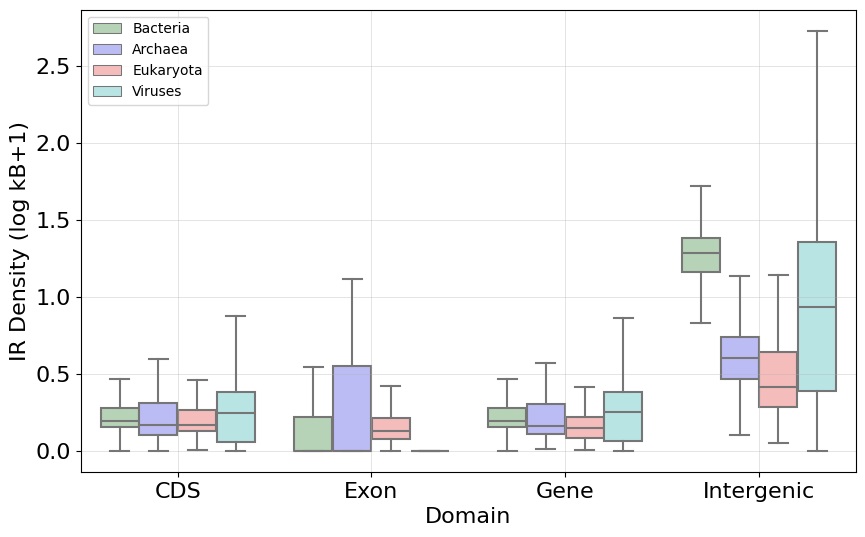

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.boxplot(data=compartment_metadata_with_intergenic.query("irp_total_bp > 0").reset_index().assign(irp_coverage=lambda df: df['irp_coverage'].apply(lambda y: math.log(y+1, 10)))\
                                                .assign(compartment=lambda df: df['compartment'].apply(lambda y: y.capitalize() if not y.lower() == "cds" else y.upper())),
            x="compartment",
            y="irp_coverage",
            hue="superkingdom",
            palette=domain_colors,
            ax=ax,
            showfliers=False,
            zorder=3,
           )
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_xlabel("Domain")
ax.legend(title="")
ax.tick_params(axis="both", which="major", labelsize=16)
ax.set_ylabel("IR Density (log kB+1)")
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)

In [27]:
compartment_metadata_with_intergenic.query("superkingdom == 'Bacteria' & compartment=='intergenic' & irp_coverage > 1000.0")

,#assembly_accession,organism_name,genome_size,phylum,kingdom,superkingdom,irp_total_bp,overlap,total_compartment_bp,compartment,irp_coverage


In [28]:
grouped_by_domain = compartment_metadata_with_intergenic.dropna(subset=['irp_coverage'], axis=0)\
                                        .groupby(["superkingdom", "compartment"], as_index=False).agg({"irp_coverage": "mean"})
# grouped_by_domain.loc[:, "compartment"] = pd.Categorical(grouped_by_domain["compartment"], ["intergenic", "gene", "exon", "CDS"])
# grouped_by_domain = grouped_by_domain.sort_values(by=["superkingdom", "compartment"], ascending=False)
grouped_by_domain

,superkingdom,compartment,irp_coverage
0,Archaea,CDS,0.776450
1,Archaea,exon,1.352870
2,Archaea,gene,0.741380
3,Archaea,intergenic,3.876476
4,Bacteria,CDS,0.839942
5,Bacteria,exon,0.552396
6,Bacteria,gene,0.826268
7,Bacteria,intergenic,19.572470
8,Eukaryota,CDS,0.886053
9,Eukaryota,exon,0.878538


In [29]:
grouped_by_domain = compartment_metadata_with_intergenic.dropna(subset=['irp_coverage'], axis=0)\
                                        .groupby(["superkingdom", "compartment"], as_index=False).agg({"irp_coverage": "mean"})
# grouped_by_domain.loc[:, "compartment"] = pd.Categorical(grouped_by_domain["compartment"], ["intergenic", "gene", "exon", "CDS"])
# grouped_by_domain = grouped_by_domain.sort_values(by=["superkingdom", "compartment"], ascending=False)
grouped_by_domain

,superkingdom,compartment,irp_coverage
0,Archaea,CDS,0.776450
1,Archaea,exon,1.352870
2,Archaea,gene,0.741380
3,Archaea,intergenic,3.876476
4,Bacteria,CDS,0.839942
5,Bacteria,exon,0.552396
6,Bacteria,gene,0.826268
7,Bacteria,intergenic,19.572470
8,Eukaryota,CDS,0.886053
9,Eukaryota,exon,0.878538


In [30]:
grouped_by_domain.to_csv("inverted_repeats/domain_compartments.csv", index=False, mode="w")

In [31]:
grouped_by_kingdom = compartment_metadata_with_intergenic\
                                        .query("kingdom != 'Unclassified Viruses'")\
                                        .dropna(subset=['irp_coverage'], axis=0).query(f"irp_coverage < {float('inf')}")\
                                        .groupby(["kingdom", "compartment"])\
                                        .agg({"irp_coverage": "mean"})\
                                        .reset_index()
# grouped_by_kingdom.loc[:, "compartment"] = pd.Categorical(grouped_by_kingdom["compartment"], ["intergenic", "gene", "exon", "CDS"])
grouped_by_kingdom = grouped_by_kingdom.sort_values(by=["kingdom", "compartment"], ascending=False)
grouped_by_kingdom

,kingdom,compartment,irp_coverage
59,Zilligvirae,intergenic,7.853235
58,Zilligvirae,gene,0.591685
57,Zilligvirae,CDS,0.591685
56,Trapavirae,intergenic,5.227311
55,Trapavirae,gene,2.122140
54,Trapavirae,CDS,2.122140
53,Shotokuvirae,intergenic,34.640673
52,Shotokuvirae,gene,5.931511
51,Shotokuvirae,exon,0.000000
50,Shotokuvirae,CDS,5.641945


/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

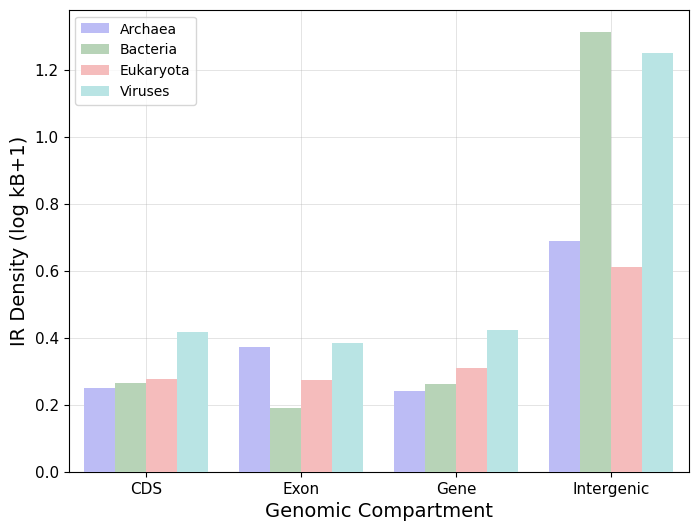

In [32]:
import seaborn as sns
import math

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
sns.barplot(data=grouped_by_domain.assign(irp_coverage=lambda df: df['irp_coverage'].apply(lambda y: math.log(y+1, 10)))\
                                                .assign(compartment=lambda df: df['compartment'].apply(lambda y: y.capitalize() if not y.lower() == "cds" else y.upper())), 
            palette=domain_colors, zorder=3, 
            x="compartment", 
            y="irp_coverage", 
            hue="superkingdom")
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.legend(title="")
ax.set_xlabel("Genomic Compartment")
ax.tick_params(axis="both", which="major", labelsize=11)
ax.set_ylabel("IR Density (log kB+1)")
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

In [33]:
kingdom_color_palette = { # "Viruses": "#b2ebeb",
                          "Viruses": "#87c4c4",
                         # "Bacteria": "#b2d8b2",
                         "Eubacteria": "#0fbf2d",
                         # "Archaea": "#b2b2ff",
                         "Archaeabacteria": "#7b7bed",
                         "Fungi": "#4d325e",
                         "Plantae": "#b50996",
                        "Animalia": "#9bba2d",
                        "Protista": "#c78f5b"
                        } 

In [34]:
compartment_metadata_pivot = compartment_metadata_with_intergenic.pivot(columns="compartment", values="irp_coverage", index="#assembly_accession")\
                                .merge(compartment_metadata_with_intergenic[["#assembly_accession", "phylum", "kingdom", "superkingdom"]].drop_duplicates(),
                                               how="left",
                                       left_index=True, 
                                       right_on="#assembly_accession"
                                      )\
                            .groupby("phylum")\
                            .agg({"kingdom": "first",
                                  "superkingdom": "first",
                                  "CDS": "mean",
                                  "exon": "mean",
                                  "gene": "mean",
                                  "intergenic": "mean"
                                 })\
                .assign(kingdom=lambda df: df['kingdom'].apply(lambda x: x if x in kingdom_color_palette else 'Viruses'))
                                                
compartment_metadata_pivot

,kingdom,superkingdom,CDS,exon,gene,intergenic
phylum,,,,,,
Abditibacteriota,Eubacteria,Bacteria,0.728922,1.266076,0.730154,21.234242
Acidobacteriota,Eubacteria,Bacteria,0.603359,0.348331,0.598594,12.470660
Actinomycetota,Eubacteria,Bacteria,1.143580,0.309305,1.132985,15.138950
Apicomplexa,Protista,Eukaryota,2.212952,2.944728,3.513348,15.839435
Aquificota,Eubacteria,Bacteria,0.338246,2.218473,0.354164,5.140887
...,...,...,...,...,...,...
Uroviricota,Viruses,Viruses,0.696784,0.454651,0.698006,16.285518
Verrucomicrobiota,Eubacteria,Bacteria,0.664162,0.237648,0.672881,12.871212
Vulcanimicrobiota,Eubacteria,Bacteria,2.067165,0.000000,2.061755,9.001816


In [35]:
compartment_metadata_pivot.isna().sum()

kingdom         0
superkingdom    0
CDS             0
exon            5
gene            0
intergenic      0
dtype: int64

In [36]:
compartment_metadata_pivot.kingdom.value_counts()

kingdom
Eubacteria         72
Viruses            17
Archaeabacteria    13
Plantae             3
Fungi               3
Protista            2
Animalia            2
Name: count, dtype: int64

In [37]:
superkingdom_col = compartment_metadata_pivot['superkingdom'].map(domain_colors).tolist()
kingdom_col = compartment_metadata_pivot['kingdom'].map(kingdom_color_palette).tolist()

In [43]:
!readlink -f inverted_repeats/clustermap_compartment_transcription_sites_phylum.png

/storage/home/nmc6088/irp_analysis/inverted_repeats/clustermap_compartment_transcription_sites_phylum.png


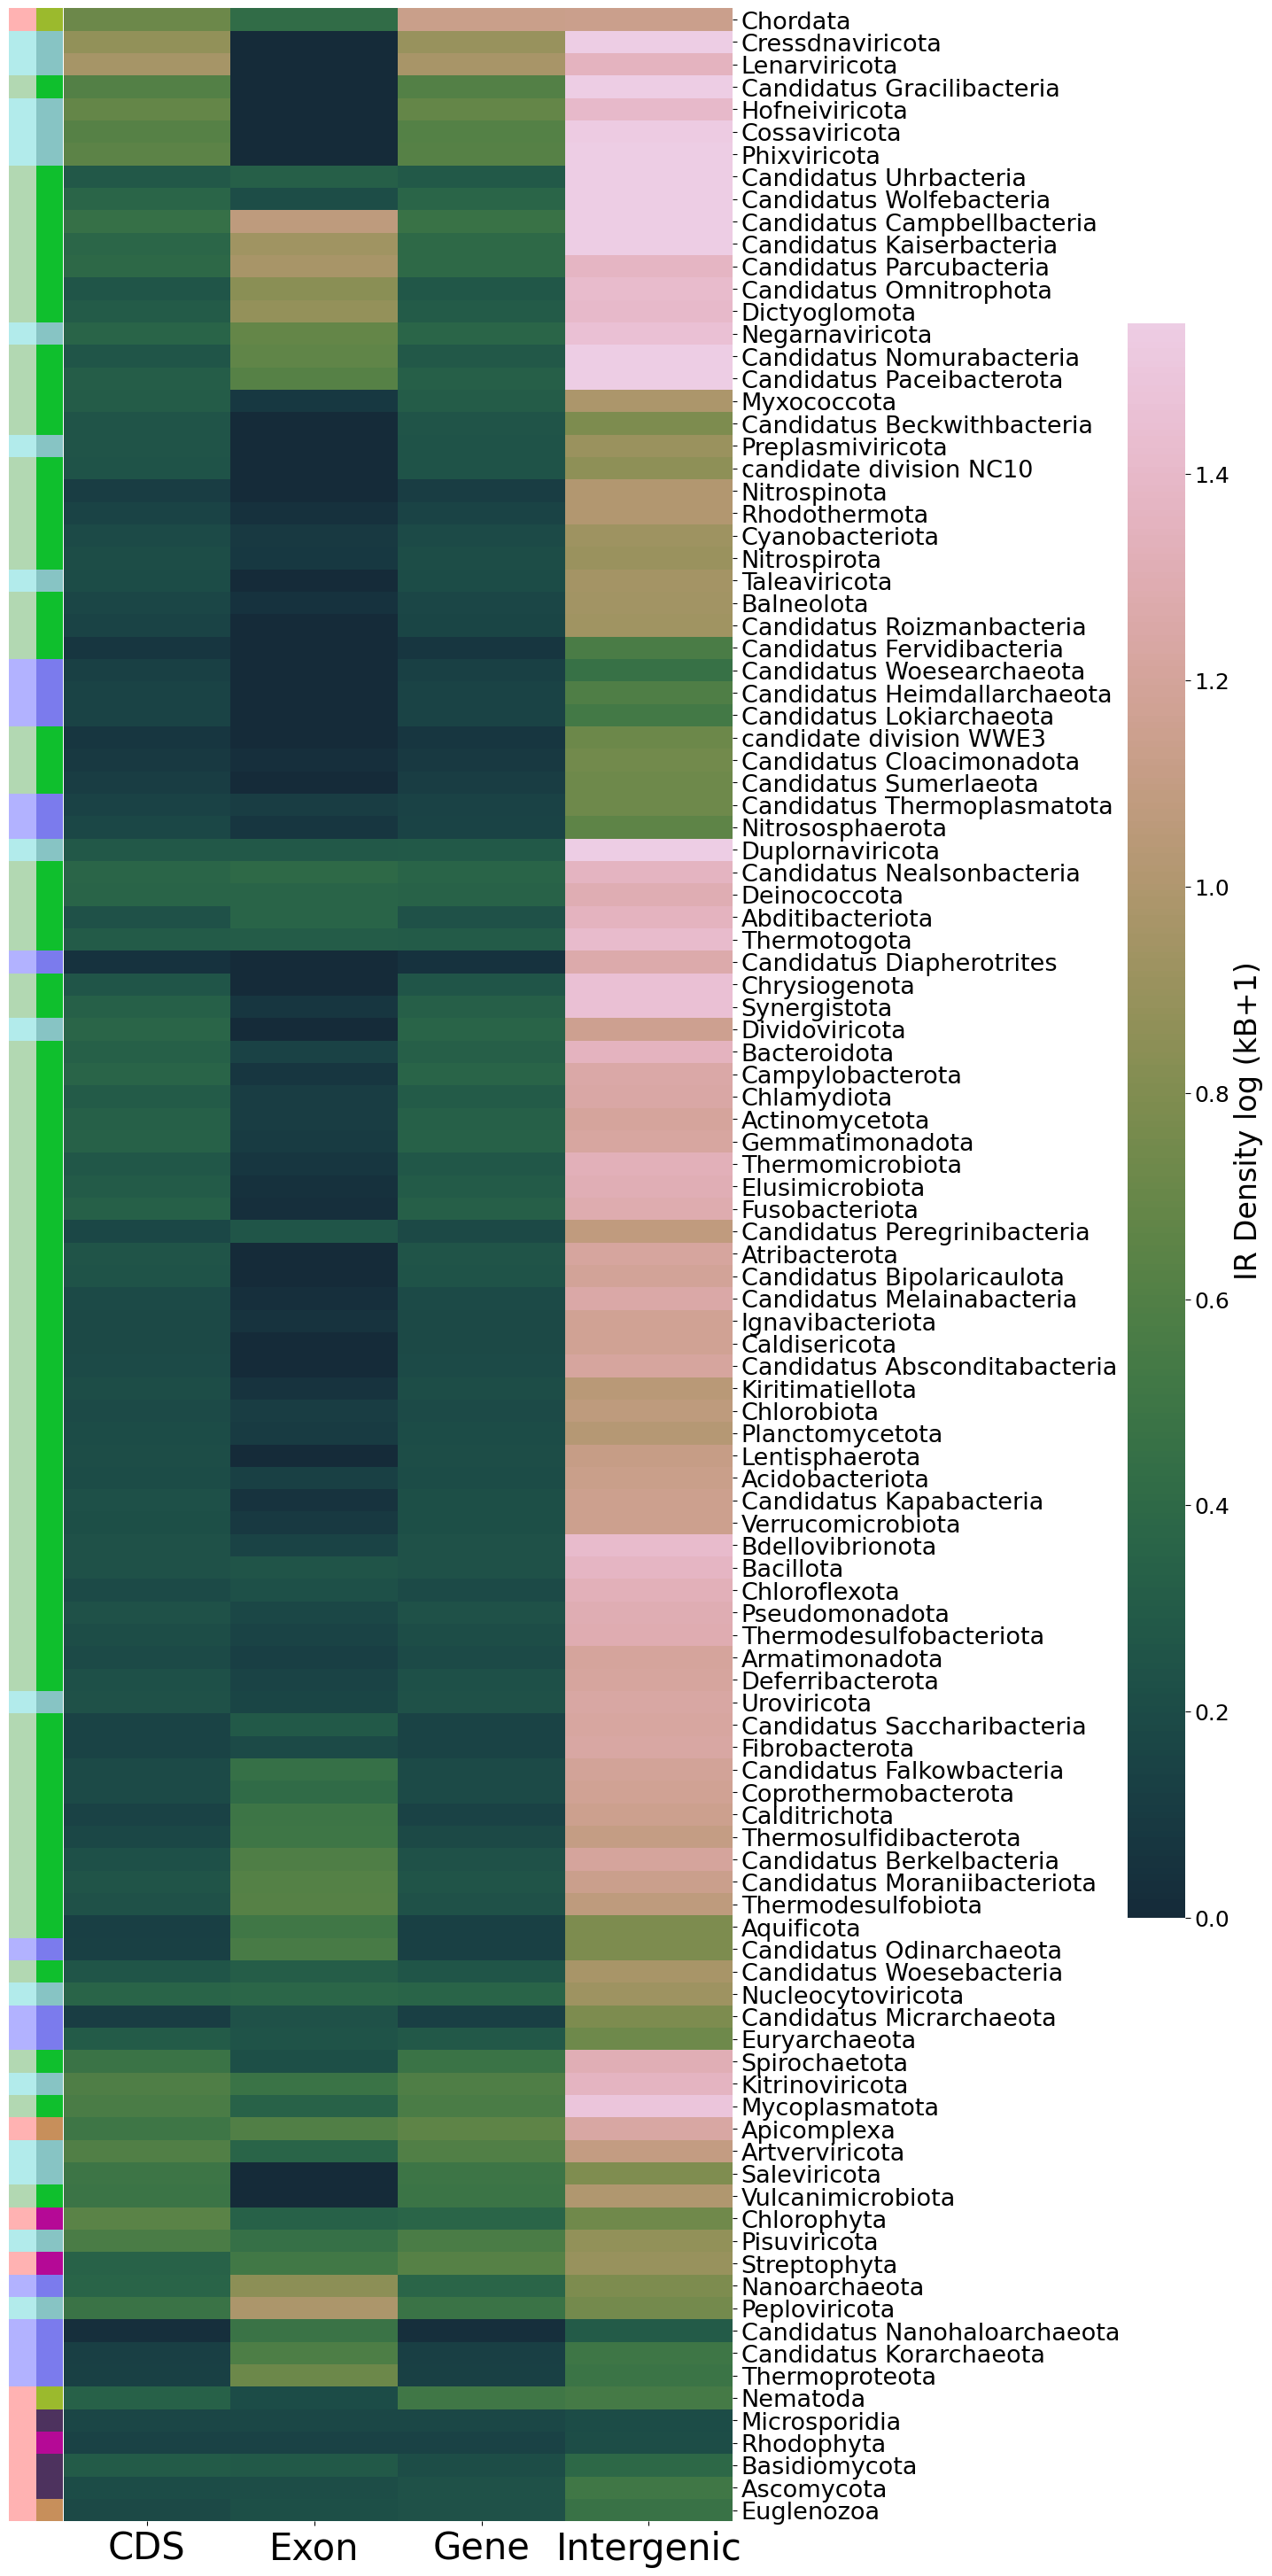

In [42]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
import seaborn as sns
import matplotlib.pyplot as plt
kws = dict(cbar_kws=dict(location="top", shrink=0.2))

figsize=(13, 36)
compartments = ["CDS", "exon", "gene", "intergenic"]

compartment_metadata_pivot_ = compartment_metadata_pivot.copy()

for compartment in compartments:
    compartment_metadata_pivot_[compartment] = compartment_metadata_pivot_[compartment].apply(lambda x: math.log(x+1, 10))
    
cg = sns.clustermap(
                   data=compartment_metadata_pivot_.drop(columns=['superkingdom', 'kingdom']).rename(columns={"exon": "Exon", "gene": "Gene", "intergenic": "Intergenic"}), 
    
                   row_colors=[superkingdom_col, kingdom_col],
                   row_cluster=True, 
                   col_cluster=False,
                   method="average",
                    # vmax=1.0,
                   cmap=sns.cubehelix_palette(start=3.1, 
                                              reverse=True,
                                              rot=-1.0, as_cmap=True),
                   figsize=figsize,
                   robust=True,
                   yticklabels=True, 
                   xticklabels=True,
                   cbar_kws={"shrink": 0.1, "orientation": "vertical"}
                   )

cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
ax = cg.ax_heatmap
ax.set_xlabel("")
# ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_ylabel("")
# ax.set_title("Phylum")
# ax.title.set_size(16)
t = ax.xaxis.get_majorticklocs()
# origin = "TSS" if ts == "start" else "TES"
# ax.set_xticks(range(len(t)), [{
#                                len(t)//2: origin, 
#                                0: -500, 
#                                len(t)//2 + len(t)//4: 250, 
#                                len(t)//4: -250, 
#                                len(t)-1: 500
#                               }.get(i, "") for i in range(len(t))])
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis="both", 
               which="major", 
               labelsize=19.5,
               rotation=0
              )
ax.tick_params(axis="x", 
               which="major", 
               labelsize=30,
               rotation=0
              )

# Customize colorbar properties
x0, _y0, _w, _h = cg.cbar_pos
cg.ax_cbar.set_position([1.14, 0.2, 0.05, 0.5])
# cg.cax.set_position([0.075, 0.2, 0.04, 0.65])  # Adjust the position of the colorbar
cg.ax_cbar.tick_params(axis='both', length=4, labelsize=18)

# Add a label to the colorbar
cg.cax.set_ylabel('IR Density log (kB+1)', size=24) #, labelpad=15, size=12)
for spine in cg.ax_cbar.spines:
    cg.ax_cbar.spines[spine].set_color('black')
    # cg.ax_cbar.spines[spine].set_linewidth(2)

mask = np.where(

Path("inverted_repeats").mkdir(exist_ok=True)
plt.gcf().savefig(f"inverted_repeats/clustermap_compartment_transcription_sites_phylum.png", bbox_inches='tight')
plt.show()